In this script, we split the data set into train (70%) and test (30%) 

## Imports

In [1]:
##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text
from preprocessing_step import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wkhal001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import pandas as pd
import numpy as np
import collections
from collections import Counter

from sklearn.model_selection import train_test_split
import string

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import pandas as pd
import numpy as pn
from numpy import mean

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import string

import collections
from collections import Counter

from string import punctuation
from os import listdir
from numpy import array

from pickle import load
from numpy import array

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


from keras.layers import LSTM
from sklearn.decomposition import PCA

import pickle
import numpy as np
from numpy import mean
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import statistics as s

import matplotlib.pyplot as plt


import sys

/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [3]:
##### imports ############
import pandas as pd
import numpy as np
import json

import joblib

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from utils_crisis_classification import clean_text

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

from Baseline_Models import Display_metrics,Display_classification_report,Confusion_matrix
from keras.backend import clear_session

## Data split for experiments

#### Read harvey

In [4]:
labeledDF=pd.read_csv("/home/wkhal001/Desktop/data_rescue_mining/labeled_ds_Corrected_csv.csv") 
del labeledDF['Unnamed: 0']

In [5]:
labeledDF

,id,status_id,created_at,text,address,loc,situ,save,sos,sos.pred,sos.correct
0,1,9.021280e+17,8/28/2017 11:19,#Harvey floods TV station #KHOU in #Houston. h...,0,NaN,0,0,0,0,0
1,2,9.022140e+17,8/28/2017 16:58,"@RandiRhodes RR call him out for visiting SA, ...",0,NaN,0,0,0,0,0
2,3,9.018300e+17,8/27/2017 15:35,Wow a tv station is flooding in Houston! So sc...,0,NaN,1,0,0,0,0
3,4,9.023740e+17,8/29/2017 3:36,"My son, dil &amp; 2 grandkids in grand lakes, ...",0,NaN,0,1,1,1,0
4,5,9.021410e+17,8/28/2017 12:09,is the beltway still flooded? ya boy need to g...,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5787,5788,9.023810e+17,8/29/2017 4:04,"Around 10,000,000,000,000 gallons of water fro...",0,NaN,0,0,0,0,0
5788,5789,9.023830e+17,8/29/2017 4:09,The road to my residence is flooded. Thank God...,0,NaN,0,0,0,0,0
5789,5790,9.023830e+17,8/29/2017 4:09,Texas road closures and flooding kept up to da...,0,NaN,0,0,0,0,0
5790,5791,9.023860e+17,8/29/2017 4:22,"@HellerWeather Tim, any maps to show where flo...",1,NaN,0,0,0,0,0


In [6]:
### clean our data set
labeledDF['cleaned_tweet'] = labeledDF['text'].apply(lambda x: " ".join(clean_text(x)))

In [7]:
labeledDF

,id,status_id,created_at,text,address,loc,situ,save,sos,sos.pred,sos.correct,cleaned_tweet
0,1,9.021280e+17,8/28/2017 11:19,#Harvey floods TV station #KHOU in #Houston. h...,0,NaN,0,0,0,0,0,harvey floods tv station khou houston
1,2,9.022140e+17,8/28/2017 16:58,"@RandiRhodes RR call him out for visiting SA, ...",0,NaN,0,0,0,0,0,randirhodes rr call visiting sa flooding mayor...
2,3,9.018300e+17,8/27/2017 15:35,Wow a tv station is flooding in Houston! So sc...,0,NaN,1,0,0,0,0,wow tv station flooding houston scary sad rain...
3,4,9.023740e+17,8/29/2017 3:36,"My son, dil &amp; 2 grandkids in grand lakes, ...",0,NaN,0,1,1,1,0,son dil amp 2 grandkids grand lakes katy tx wo...
4,5,9.021410e+17,8/28/2017 12:09,is the beltway still flooded? ya boy need to g...,0,NaN,0,0,0,0,0,beltway still flooded ya boy need go pay bills 😒
...,...,...,...,...,...,...,...,...,...,...,...,...
5787,5788,9.023810e+17,8/29/2017 4:04,"Around 10,000,000,000,000 gallons of water fro...",0,NaN,0,0,0,0,0,around 10000000000000 gallons water harvey ins...
5788,5789,9.023830e+17,8/29/2017 4:09,The road to my residence is flooded. Thank God...,0,NaN,0,0,0,0,0,road residence flooded thank god left safe sta...
5789,5790,9.023830e+17,8/29/2017 4:09,Texas road closures and flooding kept up to da...,0,NaN,0,0,0,0,0,texas road closures flooding kept date
5790,5791,9.023860e+17,8/29/2017 4:22,"@HellerWeather Tim, any maps to show where flo...",1,NaN,0,0,0,0,0,hellerweather tim maps show flooding would mas...


In [8]:
## Extract useful columns 
df_training = labeledDF[['text','cleaned_tweet','sos.correct']]
df_training.columns= ['non_cleaned_text','text','label']

In [9]:
df_training

,non_cleaned_text,text,label
0,#Harvey floods TV station #KHOU in #Houston. h...,harvey floods tv station khou houston,0
1,"@RandiRhodes RR call him out for visiting SA, ...",randirhodes rr call visiting sa flooding mayor...,0
2,Wow a tv station is flooding in Houston! So sc...,wow tv station flooding houston scary sad rain...,0
3,"My son, dil &amp; 2 grandkids in grand lakes, ...",son dil amp 2 grandkids grand lakes katy tx wo...,0
4,is the beltway still flooded? ya boy need to g...,beltway still flooded ya boy need go pay bills 😒,0
...,...,...,...
5787,"Around 10,000,000,000,000 gallons of water fro...",around 10000000000000 gallons water harvey ins...,0
5788,The road to my residence is flooded. Thank God...,road residence flooded thank god left safe sta...,0
5789,Texas road closures and flooding kept up to da...,texas road closures flooding kept date,0
5790,"@HellerWeather Tim, any maps to show where flo...",hellerweather tim maps show flooding would mas...,0


In [10]:
df_training['label'].value_counts()

0    5539
1     253
Name: label, dtype: int64

#### Split data set (unified accross all experiments)

In [11]:
################ Split data into: 70% training and 30% testing #####################
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df_training,df_training['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3,
                                                                    stratify=df_training['label'])

print('Length training......',len(Train_Y))
print('Length testing......',len(Test_Y))

Length training...... 4054
Length testing...... 1738


In [12]:
Train_X

,non_cleaned_text,text,label
5667,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
813,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
3312,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
5021,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
5104,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
48,"Heavy Rain, Flooding Cause Concern Across Tamp...",heavy rain flooding cause concern across tampa...,0
3755,The Wall Street Journal: Hurricane Harvey like...,wall street journal hurricane harvey likely sn...,0
5438,Please DO NOT drive into the water if you can ...,please drive water see road please harvey,0
5419,President Trump Tweets About 2016 Election and...,president trump tweets 2016 election border wa...,0


In [13]:
Test_X

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


In [14]:
Train_X['label'].value_counts()

0    3877
1     177
Name: label, dtype: int64

In [15]:
Test_X['label'].value_counts()

0    1662
1      76
Name: label, dtype: int64

In [16]:
# #### save split data set for final evaluation #####
# train_path = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__Comparison_thesis/Data/train_harvey_final_evaluation.csv'
# Train_X.to_csv(train_path,index=False)

# #### save split data set for final evaluation #####
# test_path = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__Comparison_thesis/Data/test_harvey_final_evaluation.csv'
# Test_X.to_csv(test_path,index=False)

#### Assign training data

In [27]:
df_training_validation = Train_X

In [28]:
df_training_validation

,non_cleaned_text,text,label
0,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
1,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
2,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
3,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
4,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
4934,please help my friend in a wheelchair flooded ...,please help friend wheelchair flooded home plz...,1
4935,@HCSOTexas @HoustonPolice Elderly couple await...,hcsotexas houstonpolice elderly couple awaitin...,1
4936,Life threatening situation!!! 9231 Oak knoll ...,life threatening situation 9231 oak knoll rd h...,1
4937,@TrillChino09 A family of 6 adults and 4 kids ...,trillchino09 family 6 adults 4 kids need boat ...,1


In [ ]:
######### save grids ##########
ls_grid = [save_sets[0]['grid'],save_sets[1]['grid'],save_sets[2]['grid'],save_sets[3]['grid'],save_sets[4]['grid']]

path = "/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV"

iteration =1
for g in ls_grid:  
    save_path = path + "/" + "grid-CV-iter"+ str(iteration)
    joblib.dump(g, save_path)
    iteration = iteration + 1

In [19]:
######### load grids ##########
import joblib

grid1 = joblib.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV/500_uni_bi(2)/grid-CV-iter1")
grid2 = joblib.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV/500_uni_bi(2)/grid-CV-iter2")
grid3 = joblib.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV/500_uni_bi(2)/grid-CV-iter3")
grid4 = joblib.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV/500_uni_bi(2)/grid-CV-iter4")
grid5 = joblib.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/SVM-CV/500_uni_bi(2)/grid-CV-iter5")

ls_grid = [grid1,grid2,grid3,grid4,grid5]

In [20]:
### best models and scores
best_models = [g.best_params_ for g in ls_grid]
best_f_scores = [g.best_score_ for g in ls_grid]

In [21]:
best_models

[{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 15, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 20, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}]

In [22]:
best_f_scores

[0.8262187812187813,
 0.84452331872108,
 0.8556929174831988,
 0.8354080219521084,
 0.841232699225657]

In [23]:
g1 = ls_grid[0]

In [24]:
g1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20, 50, 100, 150],
                         'degree': [2, 3], 'gamma': [0.001, 0.1, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='f1', verbose=1)

In [25]:
g1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [26]:
fold1 = g1.cv_results_['split0_test_score']
fold2 = g1.cv_results_['split1_test_score']
fold3 = g1.cv_results_['split2_test_score']
fold4 = g1.cv_results_['split3_test_score']
fold5 = g1.cv_results_['split4_test_score']

In [27]:
import statistics

average_5_folds = [] 
for v1,v2,v3,v4,v5 in zip(fold1,fold2,fold3,fold4,fold5): 
    ls = [v1,v2,v3,v4,v5]
    average_f1 = statistics.mean(ls)
    average_5_folds.append(average_f1)

In [84]:
print(max(average_5_folds))

0.8262187812187812


In [29]:
print('Average F1 scores (5-fold)...',statistics.mean(average_5_folds))
print('Stdev F1 scores (5-fold).....',statistics.stdev(average_5_folds))

Average 5-fold F1 scores... 0.5474111372118114
Stdev 5-fold F1 scores..... 0.3135862231804127


In [86]:
print()

0.3135862231804127


## Final comparsion

Models to compare on the testing set: SVM TFIDF; SVM BERT; CNN; logical filters; Integrated model

#### Results by logical approach

In [19]:
ls_crisis_hashtags = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']

def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found


#--------------------  Create filter 1 ---------------------------------------#
# Feature 1.1 keywords with hurricane/flood
rgx_f1_1 = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"

# Feature 1.2 keywords with situation descriptions
rgx_f1_2 = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"


# Feature 1.3: contain both the following two keyword groups (ignore case):
# group 1: names of cities and towns near Houston
# group 2: flood related keywords. e.g. flood, flooding
rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"


#------------------ Create filter 2: Requesting rescue ------------------------#
rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"

# ------ Create filter 3: address description-----------------------------------#
address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
non_address_pattern = "\\b\\d+\\s+(am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"

# ------ Create filter 4: with key words of tweets about political -------#
rgx_f4 = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
# all tweets about ICE and buzzfeed are polical ones

# ------ Create filter 5: with key words of tweets about offering helps -------#
rgx_f5 = "\\b(donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"

# ------ Create filter 6: with key words of tweets about commercial -------#
rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
# 2 regex, one  for market; one for open;


# ------ Create filter 7: with key words of tweets of newsreport -------#
rgx_f7 = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
# SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
# typically used by news


# ------ Create filter 8: rescue status update --------------#
rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"



In [20]:
Testing_set_comparison = Test_X

In [21]:
Testing_set_comparison

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


In [22]:
Testing_set_comparison['f1_1'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f1_1,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)
Testing_set_comparison['f1_2'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f1_2,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

#### added filter 1: hashtags
Testing_set_comparison['f1_4'] = Testing_set_comparison.apply(lambda row:1 if extract_hash_tags(row['non_cleaned_text'],ls_crisis_hashtags) == True else 0,axis=1)

Testing_set_comparison['f2'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f2,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f3_1'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(address_pattern,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)
Testing_set_comparison['f3_2'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(non_address_pattern,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f4'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f4,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f5'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f5,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f6'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f6,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f7'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f7,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)

Testing_set_comparison['f8'] = Testing_set_comparison.apply(lambda row: 1 if re.findall(rgx_f8,row['non_cleaned_text'],re.IGNORECASE) else 0,axis=1)


In [23]:
Testing_set_comparison

,non_cleaned_text,text,label,f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0,0,0,0,0,0,0,0,0,0,0,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0,1,0,0,0,0,0,0,0,0,0,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0,1,0,1,1,1,0,0,0,0,0,1
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0,0,0,0,0,0,0,0,0,0,0,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0,0,0,0,0,0,0,0,0,0,0,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0,1,0,0,0,0,0,0,0,0,0,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0,0,0,0,0,0,0,0,0,0,0,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
### add column corresponding to our filter classification
Testing_set_comparison['filter_sos'] = 0

In [25]:
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0

    
### evaluate the tweet using the logical expression ####
def evaluate_expression(f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8): 
    f1 = f1_1 or f1_2 or f1_4
    f3 = logical_evaluation_address(f3_1,f3_2)
    f1_union_f2= f1 or f2
    f1_f2_intersect_f3 = f1_union_f2 and f3
    excluded_filters = f4 or f5 or f6 or f7 or f8
    return logical_evaluation_final(f1_f2_intersect_f3,excluded_filters)

In [26]:
## run classifier ###
Testing_set_comparison['filter_sos'] = Testing_set_comparison.apply(lambda row: 1 if evaluate_expression(row['f1_1'],row['f1_2'],row['f1_4'],row['f2'],row['f3_1'],row['f3_2'],row['f4'],row['f5'],row['f6'],row['f7'],row['f8']) else 0,axis=1)

labels = Testing_set_comparison['label']
preds = Testing_set_comparison['filter_sos']


In [30]:
Testing_set_comparison.to_csv('/home/wkhal001/Desktop/logical_results.csv',index=False)

In [27]:
from sklearn.metrics import classification_report

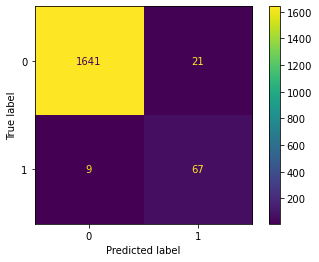

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(labels, preds, labels=np.unique(labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot()

In [28]:
dict_r = classification_report(labels, preds,output_dict = True)

dict_r

{'0': {'precision': 0.9945454545454545,
  'recall': 0.9873646209386282,
  'f1-score': 0.9909420289855072,
  'support': 1662},
 '1': {'precision': 0.7613636363636364,
  'recall': 0.881578947368421,
  'f1-score': 0.8170731707317073,
  'support': 76},
 'accuracy': 0.9827387802071347,
 'macro avg': {'precision': 0.8779545454545454,
  'recall': 0.9344717841535246,
  'f1-score': 0.9040075998586072,
  'support': 1738},
 'weighted avg': {'precision': 0.984348781253269,
  'recall': 0.9827387802071347,
  'f1-score': 0.9833390179226252,
  'support': 1738}}

#### Results by SVM-TFIDF

Model setting: TFIDF 500 unigrams (C=10,degree=2,gamma=1,kernel='rbf')

In [19]:
df_training

,non_cleaned_text,text,label
0,#Harvey floods TV station #KHOU in #Houston. h...,harvey floods tv station khou houston,0
1,"@RandiRhodes RR call him out for visiting SA, ...",randirhodes rr call visiting sa flooding mayor...,0
2,Wow a tv station is flooding in Houston! So sc...,wow tv station flooding houston scary sad rain...,0
3,"My son, dil &amp; 2 grandkids in grand lakes, ...",son dil amp 2 grandkids grand lakes katy tx wo...,0
4,is the beltway still flooded? ya boy need to g...,beltway still flooded ya boy need go pay bills 😒,0
...,...,...,...
5787,"Around 10,000,000,000,000 gallons of water fro...",around 10000000000000 gallons water harvey ins...,0
5788,The road to my residence is flooded. Thank God...,road residence flooded thank god left safe sta...,0
5789,Texas road closures and flooding kept up to da...,texas road closures flooding kept date,0
5790,"@HellerWeather Tim, any maps to show where flo...",hellerweather tim maps show flooding would mas...,0


In [20]:
Train_X

,non_cleaned_text,text,label
5667,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
813,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
3312,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
5021,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
5104,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
48,"Heavy Rain, Flooding Cause Concern Across Tamp...",heavy rain flooding cause concern across tampa...,0
3755,The Wall Street Journal: Hurricane Harvey like...,wall street journal hurricane harvey likely sn...,0
5438,Please DO NOT drive into the water if you can ...,please drive water see road please harvey,0
5419,President Trump Tweets About 2016 Election and...,president trump tweets 2016 election border wa...,0


In [21]:
Test_X

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


In [23]:
Train_Y

5667    0
813     0
3312    0
5021    0
5104    0
       ..
48      0
3755    0
5438    0
5419    0
1194    0
Name: label, Length: 4054, dtype: int64

In [22]:
Test_X['label'].value_counts()

0    1662
1      76
Name: label, dtype: int64

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from Baseline_Models import Create_TFIDF,Vector_Encoding_TFIDF,Create_BOW,Vector_Encoding_BOW

TFID = Create_TFIDF(df_training['text'],500,1,1)

rep = 0
eval_results = {}
f1_list = []
recall_list = [] 
precision_list = []
for i in range(1):
    
    print('------------------- rep ',rep,'---------------------')
    
    ###### SVM - vectorize input text using TF-IDF ######
    Train_X_TFIDF = Vector_Encoding_TFIDF(TFID,Train_X['text'])
    
    ###### defining parameter range ######
    param_grid = {'C':10 ,'gamma':1 ,'degree':2 ,'kernel':'rbf'} 
    
    ###### Train SVM ######
    SVM = SVC(C=param_grid['C'], kernel=param_grid['kernel'],degree=param_grid['degree'] ,gamma=param_grid['gamma']) 
    SVM.fit(Train_X_TFIDF,Train_Y)
    
    ##### Predict ##########
    Test_X_TFIDF = Vector_Encoding_TFIDF(TFID,Test_X['text'])
    preds = SVM.predict(Test_X_TFIDF)
    
    ##### classification results on the test set ##########
    dict_r = classification_report(Test_Y, preds,output_dict = True)
    
    print('F1 score.....',dict_r['1']['f1-score'])
    f1_list.append(dict_r['1']['f1-score'])
    
    print('Recall.....',dict_r['1']['recall'])
    recall_list.append(dict_r['1']['f1-score'])
    
    print('Precision.....',dict_r['1']['precision'])
    f1_list.append(dict_r['1']['f1-score'])
    precision_list.append({rep: dict_r})
    
    print('-------------------------------------------------')
    
    rep = rep + 1 


------------------- rep  0 ---------------------
F1 score..... 0.7887323943661972
Recall..... 0.7368421052631579
Precision..... 0.8484848484848485
-------------------------------------------------


In [39]:
dict_r

{'0': {'precision': 0.9880382775119617,
  'recall': 0.9939831528279182,
  'f1-score': 0.9910017996400721,
  'support': 1662},
 '1': {'precision': 0.8484848484848485,
  'recall': 0.7368421052631579,
  'f1-score': 0.7887323943661972,
  'support': 76},
 'accuracy': 0.9827387802071347,
 'macro avg': {'precision': 0.9182615629984051,
  'recall': 0.865412629045538,
  'f1-score': 0.8898670970031346,
  'support': 1738},
 'weighted avg': {'precision': 0.9819358260700396,
  'recall': 0.9827387802071347,
  'f1-score': 0.9821568774301673,
  'support': 1738}}

#### Results by SVM-BERT

In [16]:
Train_X

,non_cleaned_text,text,label
5667,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
813,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
3312,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
5021,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
5104,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
48,"Heavy Rain, Flooding Cause Concern Across Tamp...",heavy rain flooding cause concern across tampa...,0
3755,The Wall Street Journal: Hurricane Harvey like...,wall street journal hurricane harvey likely sn...,0
5438,Please DO NOT drive into the water if you can ...,please drive water see road please harvey,0
5419,President Trump Tweets About 2016 Election and...,president trump tweets 2016 election border wa...,0


In [17]:
Train_Y

5667    0
813     0
3312    0
5021    0
5104    0
       ..
48      0
3755    0
5438    0
5419    0
1194    0
Name: label, Length: 4054, dtype: int64

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast, BertModel, BertTokenizer

# specify GPU
device = torch.device("cuda")

rep = 0
svm_bert_dict = {}
for i in range(10): 
    print('---------------- rep ',rep,'-------------')
    
    ###### Run BERT to get the train and test feature vectors ######
    bert = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)    
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    max_seq= 36

    ###### vectorize text using BERT          
    max_seq_len = max_seq  
    #tokenize and encode sequences in the training set
    tokens_train = tokenizer.batch_encode_plus(
        Train_X['text'].tolist(),
        max_length = max_seq_len,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )

    # tokenize and encode sequences in the validation set
    tokens_test = tokenizer.batch_encode_plus(
        Test_X['text'].tolist(),
        max_length = max_seq_len,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )                                                                

    # for train set
    train_seq = torch.tensor(tokens_train['input_ids'])
    train_mask = torch.tensor(tokens_train['attention_mask'])
    train_y = torch.tensor(Train_Y.tolist())

    # for validation set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])
    test_y = torch.tensor(Test_Y.tolist())

    bert.eval()

    with torch.no_grad():
        outputs = bert(train_seq,train_mask)
        hidden_states = outputs[2]


    with torch.no_grad():
        outputs_test = bert(test_seq,test_mask)
        hidden_states_test = outputs_test[2]

    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = token_embeddings.permute(1,2,0,3)

    token_embeddings_test = torch.stack(hidden_states_test, dim=0)
    token_embeddings_test = token_embeddings_test.permute(1,2,0,3)

    print('Bert embedding train shape',token_embeddings.size())
    print('Bert embedding test shape',token_embeddings_test.size())

    #### add the word vectors of the last 4 layers -- each token is concatenated in 3072 length vector    
    Train_bert_SVM = []
    for input_tweet in token_embeddings: 
        token_vecs_cat = []
        for token in input_tweet:
            cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)   # 4 last hidden layers
            #cat_vec = torch.sum(torch.stack([token[-1],token[-2],token[-3],token[-4]]), dim = 0)           # summing the 4 last hidden layers
            # cat_vec = token[-1]
            token_vecs_cat.append(cat_vec)

        Train_bert_SVM.append(token_vecs_cat[0])


    Test_bert_SVM = []
    for input_tweet in token_embeddings_test: 
        token_vecs_cat = []
        for token in input_tweet:
            cat_vec_t = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
            #cat_vec_t = torch.sum(torch.stack([token[-1],token[-2],token[-3],token[-4]]), dim = 0)           # summing the 4 last hidden layers
            #cat_vec_t = token[-1]
            token_vecs_cat.append(cat_vec_t)

        Test_bert_SVM.append(token_vecs_cat[0])

    print('encoded......')
    print(len(Train_bert_SVM))
    print(len(Test_bert_SVM))

    #### convert train and test data tensors into numpy array
    ls_input_train = [e.numpy() for e in Train_bert_SVM]
    ls_input_test = [e.numpy() for e in Test_bert_SVM]  
    
    ### train the classifier #######
    SVM = SVC(C=15, kernel='rbf',degree=2 ,gamma=0.001)  
    SVM.fit(ls_input_train,Train_Y)
    
    ## test the classifier #######
    preds = SVM.predict(ls_input_test)
    
    ##### plot results #######
    dict_r = classification_report(Test_Y, preds,output_dict = True)
    print('F1 score...',dict_r['1']['f1-score'])
    rep = rep + 1
    print('-------------------------------------------')
    
    svm_bert_dict.update({rep:dict_r})
    

---------------- rep  0 -------------


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Bert embedding train shape torch.Size([4054, 36, 13, 768])
Bert embedding test shape torch.Size([1738, 36, 13, 768])
encoded......
4054
1738
F1 score... 0.842857142857143
-------------------------------------------
---------------- rep  1 -------------


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Bert embedding train shape torch.Size([4054, 36, 13, 768])
Bert embedding test shape torch.Size([1738, 36, 13, 768])
encoded......
4054
1738
F1 score... 0.842857142857143
-------------------------------------------
---------------- rep  2 -------------


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Bert embedding train shape torch.Size([4054, 36, 13, 768])
Bert embedding test shape torch.Size([1738, 36, 13, 768])
encoded......
4054
1738
F1 score... 0.842857142857143
-------------------------------------------
---------------- rep  3 -------------


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Bert embedding train shape torch.Size([4054, 36, 13, 768])
Bert embedding test shape torch.Size([1738, 36, 13, 768])
encoded......
4054
1738
F1 score... 0.842857142857143
-------------------------------------------
---------------- rep  4 -------------


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


#### Results by fine-tuned BERT

In this section, we train and evaluate fine-tuned BERT model

##### Additional imports

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from Baseline_Models import Display_metrics,Display_classification_report,Confusion_matrix

In [20]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")
device

device(type='cuda')

##### BERT architecture

Here, we define BERT architecture in pytorch (I used BERT model from Huggingface) 

In [21]:
class BERT_Arch(nn.Module):

    def __init__(self, bert, layers = None):
      
        super(BERT_Arch, self).__init__()

        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.5)
      
        # relu activation function
        self.relu =  nn.ReLU()
    

        self.fc1 = nn.Linear(768,2)
        

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask,layers = 2):

        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
      
        if layers == 2:
            x = self.fc2(x)
        
        if layers == 3: 
            x = self.fc2(x)
            x = self.fc3(x)
        
        if layers == 4: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            
        if layers == 5: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            x = self.fc5(x)
            
        
        # apply softmax activation
        x = self.softmax(x)

        return x  
    
    
# function to train the model
def train():
      
    model.train()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
    
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
              print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch

        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask,nb_layers)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

        # append the model predictions
        total_preds.append(preds)

        # compute the training loss of the epoch
        avg_loss = total_loss / len(train_dataloader)
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

# function for evaluating the model
def evaluate():
  
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
      
            # Calculate elapsed time in minutes.
            #elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad(): 
            # model predictions
            preds = model(sent_id, mask,nb_layers)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


In [22]:
Train_X

,non_cleaned_text,text,label
5667,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
813,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
3312,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
5021,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
5104,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
48,"Heavy Rain, Flooding Cause Concern Across Tamp...",heavy rain flooding cause concern across tampa...,0
3755,The Wall Street Journal: Hurricane Harvey like...,wall street journal hurricane harvey likely sn...,0
5438,Please DO NOT drive into the water if you can ...,please drive water see road please harvey,0
5419,President Trump Tweets About 2016 Election and...,president trump tweets 2016 election border wa...,0


In [23]:
Test_X

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


##### Fine-tuned BERT evaluation mode (Use best fine-tuned model weight)

In this section, I used BERT weights produced by the best fine-tuned model (change the saved model path accordingly)

BERT is used in evaluation mode

training set:  4054
testing set:  1738
f1-score for class 1 ---> 0.8903225806451613
Precision for class 1 ---> 0.8734177215189873
Recall for class 1 ---> 0.9078947368421053


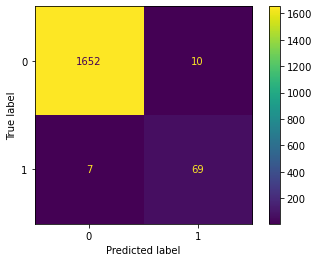

In [25]:
############################################################
############### Test script ################################
############################################################

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

Config_ls = {'lr':0.00002,'nb_epochs':20,'nb_layers':1,'max_seq':36,'batch_size':16}

print("training set: ",str(len(Train_X)))
print("testing set: ",str(len(Test_X)))

##############################
#### parameters ##############
##############################
learning_rate = Config_ls['lr']
nb_epochs = Config_ls['nb_epochs']
max_seq = Config_ls['max_seq']
batch_size = Config_ls['batch_size']
nb_layers =Config_ls['nb_layers']
##############################
##############################
##############################

# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = True

# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert,nb_layers)

# push the model to GPU
model = model.to(device)

### load pretrained model ########
model.load_state_dict(torch.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/saved_weights_bert_7.pt"))
model.eval()

# parameter 1
max_seq_len = max_seq   ######### parameter 1 ###################

# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
        Train_X['text'].tolist(),
        padding='max_length',
        max_length = max_seq_len,
        truncation=True,
        return_token_type_ids=False
    )

# tokenize and encode sequences in the validation set
tokens_test = tokenizer.batch_encode_plus(
        Test_X['text'].tolist(),
        padding='max_length',
        max_length = max_seq_len,
        truncation=True,
        return_token_type_ids=False
    )                                                                

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(Train_Y.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(Test_Y.tolist())

optimizer = AdamW(model.parameters(), lr = learning_rate )               ######### parameter 2 ###################

#compute the class weights
#class_wts = compute_class_weight('balanced', np.unique(Train_Y),Train_Y)     
class_wts = compute_class_weight(class_weight = "balanced", classes= np.unique(Train_Y), y= Train_Y)

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)               ######### parameter 3 ###################
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(test_seq, test_mask, test_y)
# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)
# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy = nn.NLLLoss(weight=weights)  # weight=weights                                              

epochs = nb_epochs   ######### parameter 4 ###################


#### test on the testing set #######  
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device),nb_layers)
    preds = preds.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)

cr_dict = classification_report(Test_Y, preds,output_dict = True)
f_score = f1_score(Test_Y, preds, labels=np.unique(preds),average='binary')
print("f1-score for class 1 --->",f_score)

precision_score = cr_dict['1']['precision']
print("Precision for class 1 --->",precision_score)

#recall_score = recall_score(test_y, preds, average='binary')   #micro  #binary
recall_score = cr_dict['1']['recall']
print("Recall for class 1 --->",recall_score)


#cm = confusion_matrix(Test_Y, preds, labels=SVM.classes_)
cm = confusion_matrix(Test_Y, preds, labels=np.unique(Train_Y))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Train_Y))

#disp.figure_.savefig(img_path)
disp.plot()


##### Fine-tuned BERT (training)

In this section, I train (fine-tune) BERT 10 times and save the weights at each iteration 

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

Config_ls = {'lr':0.00002,'nb_epochs':20,'nb_layers':1,'max_seq':36,'batch_size':16}

rep = 1
Save_reps = {'f1':[],'recall':[],'precision':[]}
base_path_img = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert_2/'
base_path_bert = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert_2/'
for i in range(10):
    print('-------------- rep ',str(rep),'---------------------')
    
    print("training set: ",str(len(Train_X)))
    print("testing set: ",str(len(Test_X)))
    
    ##############################
    #### parameters ##############
    ##############################
    learning_rate = Config_ls['lr']
    nb_epochs = Config_ls['nb_epochs']
    max_seq = Config_ls['max_seq']
    batch_size = Config_ls['batch_size']
    nb_layers =Config_ls['nb_layers']
    ##############################
    ##############################
    ##############################

    # import BERT-base pretrained model
    bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

    # Load the BERT tokenizer
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased

    # freeze all the parameters
    for param in bert.parameters():
        param.requires_grad = True

    # pass the pre-trained BERT to our define architecture
    model = BERT_Arch(bert,nb_layers)

    # push the model to GPU
    model = model.to(device)
    
    
    # parameter 1
    max_seq_len = max_seq   ######### parameter 1 ###################

    # tokenize and encode sequences in the training set
    tokens_train = tokenizer.batch_encode_plus(
            Train_X['text'].tolist(),
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )

    # tokenize and encode sequences in the validation set
    tokens_test = tokenizer.batch_encode_plus(
            Test_X['text'].tolist(),
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )                                                                

    # for train set
    train_seq = torch.tensor(tokens_train['input_ids'])
    train_mask = torch.tensor(tokens_train['attention_mask'])
    train_y = torch.tensor(Train_Y.tolist())

    # for test set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])
    test_y = torch.tensor(Test_Y.tolist())

    optimizer = AdamW(model.parameters(), lr = learning_rate )               ######### parameter 2 ###################

    #compute the class weights
    #class_wts = compute_class_weight('balanced', np.unique(Train_Y),Train_Y)     
    class_wts = compute_class_weight(class_weight = "balanced", classes= np.unique(Train_Y), y= Train_Y)

    # wrap tensors
    train_data = TensorDataset(train_seq, train_mask, train_y)               ######### parameter 3 ###################
    # sampler for sampling the data during training
    train_sampler = RandomSampler(train_data)
    # dataLoader for train set
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    # wrap tensors
    val_data = TensorDataset(test_seq, test_mask, test_y)
    # sampler for sampling the data during training
    val_sampler = SequentialSampler(val_data)
    # dataLoader for validation set
    val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

    # convert class weights to tensor
    weights= torch.tensor(class_wts,dtype=torch.float)
    weights = weights.to(device)

    # loss function
    cross_entropy = nn.NLLLoss(weight=weights)  # weight=weights                                              

    epochs = nb_epochs   ######### parameter 4 ###################

    # set initial loss to infinite
    best_valid_loss = float('inf')

    # empty lists to store training and validation loss of each epoch
    train_losses=[]
    valid_losses=[]

    #for each epoch
    model_save_path = "/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/saved_weights_bert.pt"
    model_save_path = base_path_bert + "saved_weights_bert_"+ str(rep)+".pt"
    
    for epoch in range(epochs):
        print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

        #train model
        train_loss, _ = train()

        #evaluate model
        valid_loss, _ = evaluate()

        #save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), model_save_path)  
            #saved_weights.pt

            # append training and validation loss
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)

            print(f'\nTraining Loss: {train_loss:.3f}')
            print(f'Validation Loss: {valid_loss:.3f}')

        
    #### test on the testing set #######  
    with torch.no_grad():
        preds = model(test_seq.to(device), test_mask.to(device),nb_layers)
        preds = preds.detach().cpu().numpy()
        preds = np.argmax(preds, axis = 1)
        
    cr_dict = classification_report(Test_Y, preds,output_dict = True)
    f_score = f1_score(Test_Y, preds, labels=np.unique(preds),average='binary')
    print("f1-score for class 1 --->",f_score)
    Save_reps['f1'].append(f_score)

    precision_score = cr_dict['1']['precision']
    print("Precision for class 1 --->",precision_score)
    Save_reps['precision'].append(precision_score)

    #recall_score = recall_score(test_y, preds, average='binary')   #micro  #binary
    recall_score = cr_dict['1']['recall']
    print("Recall for class 1 --->",recall_score)
    Save_reps['recall'].append(recall_score)
    

    #cm = confusion_matrix(Test_Y, preds, labels=SVM.classes_)
    cm = confusion_matrix(Test_Y, preds, labels=np.unique(Train_Y))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Train_Y))
    img_path = base_path_img + 'confusion_matrix_re' + str(rep) + '.png'
    
    #disp.figure_.savefig(img_path)
    disp.plot()
    plt.savefig(img_path)
    rep = rep + 1


In [ ]:
import pickle

# create a binary pickle file 
f = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/Saved_results_fine_tuned_bert.pkl","wb")
pickle.dump(Save_reps,f)
f.close()


In [46]:
# open a file, where you stored the pickled data
file = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/Saved_results_fine_tuned_bert.pkl", 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

In [47]:
data

{'f1': [0.8695652173913043,
  0.8689655172413793,
  0.8783783783783783,
  0.8387096774193549,
  0.8510638297872342,
  0.8645161290322582,
  0.8903225806451613,
  0.8758169934640522,
  0.8741721854304636,
  0.8794326241134751],
 'recall': [0.7894736842105263,
  0.8289473684210527,
  0.8552631578947368,
  0.8552631578947368,
  0.7894736842105263,
  0.881578947368421,
  0.9078947368421053,
  0.881578947368421,
  0.868421052631579,
  0.8157894736842105],
 'precision': [0.967741935483871,
  0.9130434782608695,
  0.9027777777777778,
  0.8227848101265823,
  0.9230769230769231,
  0.8481012658227848,
  0.8734177215189873,
  0.8701298701298701,
  0.88,
  0.9538461538461539]}

In [49]:
import statistics

print('number of runs....',len(data['f1']))

print('------------- F1 scores --------------------')
print('average (10 runs) ',statistics.mean(data['f1']))
print('stdev (10 runs) ',statistics.stdev(data['f1']))
print('max (10 runs) ',max(data['f1']))
print('min (10 runs) ',min(data['f1']))

print('------------- recall scores --------------------')
print('average (10 runs) ',statistics.mean(data['recall']))
print('stdev (10 runs) ',statistics.stdev(data['recall']))
print('max (10 runs) ',max(data['recall']))
print('min (10 runs) ',min(data['recall']))


print('------------- precision scores --------------------')
print('average (10 runs) ',statistics.mean(data['precision']))
print('stdev (10 runs) ',statistics.stdev(data['precision']))
print('max (10 runs) ',max(data['precision']))
print('min (10 runs) ',min(data['precision']))

number of runs.... 10
------------- F1 scores --------------------
average (10 runs)  0.8690943132903062
stdev (10 runs)  0.014848178440003015
max (10 runs)  0.8903225806451613
min (10 runs)  0.8387096774193549
------------- recall scores --------------------
average (10 runs)  0.8473684210526315
stdev (10 runs)  0.040293628343353864
max (10 runs)  0.9078947368421053
min (10 runs)  0.7894736842105263
------------- precision scores --------------------
average (10 runs)  0.895491993604382
stdev (10 runs)  0.04552173594107878
max (10 runs)  0.967741935483871
min (10 runs)  0.8227848101265823


#### Results by integrated model (using fine-tuned BERT)

In the following code, I merged the fine-tuned BERT (best model obtained) with the logical features 

##### Logical features

In [49]:
import re

ls_crisis_hashtags = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']

def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found

#--------------------  Create filter 1 ---------------------------------------#
# Feature 1.1 keywords with hurricane/flood
rgx_f1_1 = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"

# Feature 1.2 keywords with situation descriptions
rgx_f1_2 = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"

# Feature 1.3: contain both the following two keyword groups (ignore case):
# group 1: names of cities and towns near Houston
# group 2: flood related keywords. e.g. flood, flooding
rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"


#-------------------- added filter 1: hashtags ---------------------------------------#
#Testing_set_comparison['f1_4'] = Testing_set_comparison.apply(lambda row:1 if extract_hash_tags(row['non_cleaned_text'],ls_crisis_hashtags) == True else 0,axis=1)


#------------------ Create filter 2: Requesting rescue ------------------------#
rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"

# ------ Create filter 3: address description-----------------------------------#
address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
non_address_pattern = "\\b\\d+\\s+(am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"

# ------ Create filter 4: with key words of tweets about political -------#
rgx_f4 = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
# all tweets about ICE and buzzfeed are polical ones

# ------ Create filter 5: with key words of tweets about offering helps -------#
rgx_f5 = "\\b(donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"

# ------ Create filter 6: with key words of tweets about commercial -------#
rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
# 2 regex, one  for market; one for open;


# ------ Create filter 7: with key words of tweets of newsreport -------#
rgx_f7 = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
# SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
# typically used by news


# ------ Create filter 8: rescue status update --------------#
rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"


##### Training and testing data

In [50]:
Train_X

,non_cleaned_text,text,label
0,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
1,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
2,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
3,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
4,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
4934,please help my friend in a wheelchair flooded ...,please help friend wheelchair flooded home plz...,1
4935,@HCSOTexas @HoustonPolice Elderly couple await...,hcsotexas houstonpolice elderly couple awaitin...,1
4936,Life threatening situation!!! 9231 Oak knoll ...,life threatening situation 9231 oak knoll rd h...,1
4937,@TrillChino09 A family of 6 adults and 4 kids ...,trillchino09 family 6 adults 4 kids need boat ...,1


In [51]:
Test_X

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


In [52]:
train_data_integrated = Train_X['text']

In [53]:
train_data_integrated_non_cleaned = Train_X['non_cleaned_text']

In [54]:
test_data_integrated = Test_X['text']

In [55]:
test_data_integrated_non_cleaned = Test_X['non_cleaned_text']

##### Logical features calculation

In [56]:
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


train_logical_features = []
for v1,v2 in zip(train_data_integrated.items(),train_data_integrated_non_cleaned.items()):    
    if re.findall(rgx_f1_1,v1[1],re.IGNORECASE):
        f1_1 =1
    else:
        f1_1=0
        
    if re.findall(rgx_f1_2,v1[1],re.IGNORECASE):
        f1_2=1
    else:
        f1_2=0
        
    if extract_hash_tags(v2[1],ls_crisis_hashtags) == True:
        f1_4 =1
    else: 
        f1_4=0       
        
    if re.findall(rgx_f2,v1[1],re.IGNORECASE):
        f2=1
    else:
        f2=0
    
    if re.findall(address_pattern,v1[1],re.IGNORECASE):
        f3_1=1
    else:
        f3_1=0
        
    if re.findall(non_address_pattern,v1[1],re.IGNORECASE):
        f3_2=1
    else:
        f3_2=0        
        
    if re.findall(rgx_f4,v1[1],re.IGNORECASE):
        f4=1
    else:
        f4=0
    
    if re.findall(rgx_f5,v1[1],re.IGNORECASE):
        f5=1
    else:
        f5=0
    
    if re.findall(rgx_f6,v1[1],re.IGNORECASE):
        f6=1
    else:
        f6=0
    
    if re.findall(rgx_f7,v1[1],re.IGNORECASE):
        f7=1
    else:
        f7=0
     
    if re.findall(rgx_f8,v1[1],re.IGNORECASE):
        f8=1
    else:
        f8=0
    
    ## create a feature vector for training set ###
    train_logical_features.append([f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8])
        
test_logical_features = []
for v1,v2 in zip(test_data_integrated.items(),test_data_integrated_non_cleaned.items()):      
    
    if re.findall(rgx_f1_1,v1[1],re.IGNORECASE):
        f1_1 =1
    else:
        f1_1=0
        
    if re.findall(rgx_f1_2,v1[1],re.IGNORECASE):
        f1_2=1
    else:
        f1_2=0
        
    if extract_hash_tags(v2[1],ls_crisis_hashtags) == True:
        f1_4 =1
    else: 
        f1_4=0     
        
        
    if re.findall(rgx_f2,v1[1],re.IGNORECASE):
        f2=1
    else:
        f2=0
    
    if re.findall(address_pattern,v1[1],re.IGNORECASE):
        f3_1=1
    else:
        f3_1=0
        
    if re.findall(non_address_pattern,v1[1],re.IGNORECASE):
        f3_2=1
    else:
        f3_2=0        
        
    if re.findall(rgx_f4,v1[1],re.IGNORECASE):
        f4=1
    else:
        f4=0
    
    if re.findall(rgx_f5,v1[1],re.IGNORECASE):
        f5=1
    else:
        f5=0
    
    if re.findall(rgx_f6,v1[1],re.IGNORECASE):
        f6=1
    else:
        f6=0
    
    if re.findall(rgx_f7,v1[1],re.IGNORECASE):
        f7=1
    else:
        f7=0
     
    if re.findall(rgx_f8,v1[1],re.IGNORECASE):
        f8=1
    else:
        f8=0
    
    ## create test feature vector ###
    test_logical_features.append([f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8])
    

In [57]:
###### calculate logical feature vectors #########
print('Length logical train features...',len(train_logical_features))
print('Length logical test features...',len(test_logical_features))
print('Length logical vector (train)...',len(train_logical_features[0]))
print('Length logical vector (test)...',len(test_logical_features[0]))

Length logical train features... 4939
Length logical test features... 1738
Length logical vector (train)... 11
Length logical vector (test)... 11


##### Bert architecture

In [58]:
######## BERT model architecture #####
class BERT_Arch(nn.Module):

    def __init__(self, bert, layers = None):
      
        super(BERT_Arch, self).__init__()

        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.5)
      
        # relu activation function
        self.relu =  nn.ReLU()
    
        # add the output layers here
        if layers ==1:    ##### change  base: 768       large: 1024
            # dense layer 1
            self.fc1 = nn.Linear(768,2)
        
        if layers == 2:
            # dense layer 1
            self.fc1 = nn.Linear(768,512)
            # dense layer 2 (Output layer)
            self.fc2 = nn.Linear(512,2)
        
        if layers == 3: 
            # dense layer 1
            self.fc1 = nn.Linear(768,1024)   ##### change 
            #dense layer 3
            self.fc2 = nn.Linear(1024,32)
            # dense layer 2 (Output layer)
            self.fc3 = nn.Linear(32,2)        
        
        
        if layers == 4: 
            self.fc1 = nn.Linear(768,1024)   ##### change 
            self.fc2 = nn.Linear(1024,256)
            self.fc3 = nn.Linear(256,32)
            self.fc4 = nn.Linear(32,2)

        if layers == 5: 
            self.fc1 = nn.Linear(768,1024)   ##### change 
            self.fc3 = nn.Linear(1024,512)
            self.fc4 = nn.Linear(512,256)
            self.fc5 = nn.Linear(256,32)
            # dense layer 2 (Output layer)
            self.fc2 = nn.Linear(32,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask,layers = 2):

        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
      
        if layers == 2:
            x = self.fc2(x)
        
        if layers == 3: 
            x = self.fc2(x)
            x = self.fc3(x)
        
        if layers == 4: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            
        if layers == 5: 
            x = self.fc2(x)
            x = self.fc3(x)
            x = self.fc4(x)
            x = self.fc5(x)
            
        
        # apply softmax activation
        x = self.softmax(x)

        return x  
    
    
# function to train the model
def train():
      
    model.train()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
    
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
              print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch

        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask,nb_layers)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

        # append the model predictions
        total_preds.append(preds)

        # compute the training loss of the epoch
        avg_loss = total_loss / len(train_dataloader)
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

# function for evaluating the model
def evaluate():
  
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
      
            # Calculate elapsed time in minutes.
            #elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad(): 
            # model predictions
            preds = model(sent_id, mask,nb_layers)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [59]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')                #bert-base-uncased

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')   #bert-base-uncased

In [60]:
nb_layers = 1

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = True

# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert,nb_layers)

In [61]:
model.load_state_dict(torch.load("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/saved_weights_bert_7.pt"))
model.eval()


BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

##### Calculate input features from BERT

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

# parameter 1
max_seq_len = 36   ######### parameter 1 ###################

# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
            Train_X['text'].tolist(),
            padding='max_length',
            max_length = max_seq_len,
            truncation=True,
            return_token_type_ids=False
        )

# tokenize and encode sequences in the validation set
tokens_test = tokenizer.batch_encode_plus(
        Test_X['text'].tolist(),
        padding='max_length',
        max_length = max_seq_len,
        truncation=True,
        return_token_type_ids=False
    )                                                                

# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(Train_Y.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(Test_Y.tolist())

with torch.no_grad():
    outputs = model.bert(train_seq,train_mask)
    
with torch.no_grad():
    outputs_test = model.bert(test_seq,test_mask)
    

In [63]:
outputs[1].shape

torch.Size([4939, 768])

In [64]:
#### convert train and test data tensors into numpy array
ls_input_train = [e.numpy() for e in outputs[1]]
ls_input_test = [e.numpy() for e in outputs_test[1]]  

In [65]:
print('Length training data (bert)',len(ls_input_train))
print('Length testing data (bert)',len(ls_input_test))
print('Length training vectors (bert)',len(ls_input_train[0]))
print('Length testing vectors (bert)',len(ls_input_test[0]))

# print('Length training data (logical variant 2)',len(Logical_train_new))
# print('Length training vector (logical variant 2)',len(Logical_train_new[0]))
# print('Length testing data (logical variant 2)',len(Logical_test_new))
# print('Length testing vector (logical variant 2)',len(Logical_test_new[0]))

Length training data (bert) 4939
Length testing data (bert) 1738
Length training vectors (bert) 768
Length testing vectors (bert) 768


##### Build integrated model using SVM

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#### create Keras neural network with both inputs ###
input_bert = Input(shape=(768,))
input_logical = Input(shape=(11,))

In [51]:
print('Length input BERT....',len(ls_input_train[0]))
print('Length input Logical....',len(train_logical_features[0]))

print('Total samples training input BERT....',len(ls_input_train))
print('Total samples training input Logical....',len(train_logical_features))

Length input BERT.... 768
Length input Logical.... 11
Total samples training input BERT.... 4054
Total samples training input Logical.... 4054


In [43]:
###### create training BERT/SVM data set ###########
SVM_training = []
for e1,e2 in zip(ls_input_train,train_logical_features): 
    SVM_training.append(np.concatenate([e1,e2]))

In [48]:
len(SVM_training[0])

779

In [49]:
SVM_testing = []
for e1,e2 in zip(ls_input_test,test_logical_features): 
    SVM_testing.append(np.concatenate([e1,e2]))

In [53]:
len(SVM_testing[0])

779

In [57]:
### train the classifier #######
SVM = SVC(C=15, kernel='rbf',degree=2 ,gamma=0.001)  
SVM.fit(SVM_training,Train_Y)

## test the classifier #######
preds = SVM.predict(SVM_testing)

##### plot results #######
dict_r = classification_report(Test_Y, preds,output_dict = True)
print('-------------------------------------------')
print('F1 score...',dict_r['1']['f1-score'])
print('Recall...',dict_r['1']['recall'])
print('Precision...',dict_r['1']['precision'])
print('-------------------------------------------')


-------------------------------------------
F1 score... 0.8961038961038961
Recall... 0.9078947368421053
Precision... 0.8846153846153846
-------------------------------------------


In [58]:
### train the classifier #######
SVM = SVC(C=15, kernel='rbf',degree=2 ,gamma=0.001)  
SVM.fit(ls_input_train,Train_Y)

## test the classifier #######
preds = SVM.predict(ls_input_test)

##### plot results #######
dict_r = classification_report(Test_Y, preds,output_dict = True)
print('-------------------------------------------')
print('F1 score...',dict_r['1']['f1-score'])
print('Recall...',dict_r['1']['recall'])
print('Precision...',dict_r['1']['precision'])
print('-------------------------------------------')


-------------------------------------------
F1 score... 0.8961038961038961
Recall... 0.9078947368421053
Precision... 0.8846153846153846
-------------------------------------------


In [59]:
### train the classifier #######
SVM = SVC(C=15, kernel='rbf',degree=2 ,gamma=0.001)  
SVM.fit(train_logical_features,Train_Y)

## test the classifier #######
preds = SVM.predict(test_logical_features)

##### plot results #######
dict_r = classification_report(Test_Y, preds,output_dict = True)
print('-------------------------------------------')
print('F1 score...',dict_r['1']['f1-score'])
print('Recall...',dict_r['1']['recall'])
print('Precision...',dict_r['1']['precision'])
print('-------------------------------------------')


-------------------------------------------
F1 score... 0.29213483146067415
Recall... 0.17105263157894737
Precision... 1.0
-------------------------------------------


##### Build integrated model (expanded)

In this section, I resized the logical vector by copying each bit 5 times

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


In [67]:
def expand_list(l=[]):
    l2 = [[i]*5 for i in l]
    l3 = []
    for j in l2:
        l3 = l3 + j
    return(l3)

In [68]:
train_logical_features[0]

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [71]:
#train_logical_loc[0]

In [72]:
test_logical_features[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [78]:
################################################
############ Tranform logical vector ###########
################################################
expanded_train_logical = []
for e in train_logical_features: #logical_train_loc #train_logical_features #train_logical_loc
    expanded_e = expand_list(e)
    expanded_train_logical.append(expanded_e)   
    
#train_logical_loc
#test_logical_loc  

In [79]:
##########################################################
############ Transform testing logical vector ###########
########################################################## 
expanded_test_logical = []
for e in test_logical_features: #logical_test_loc   #test_logical_features
    expanded_e = expand_list(e)
    expanded_test_logical.append(expanded_e)   

In [80]:
len(expanded_train_logical[0])

55

In [81]:
len(expanded_test_logical[0])

55

Hybrid model: BERT output + resized logical (in Keras)

In [82]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#### create Keras neural network with both inputs ###
input_bert = Input(shape=(768,))
input_logical = Input(shape=(60,)) #55

def create_hybrid_model(): 
    # the first branch operates on the first input
    x = Dense(256, activation="relu")(input_bert)
    x = Dense(64, activation="relu")(x)
    x = Model(inputs=input_bert, outputs=x)
    
    # # the second branch opreates on the second input
    #y = Dense(32, activation="relu")(input_logical)
    #y = Dense(5, activation="relu")(y)
    #y = Model(inputs=input_logical, outputs=y)

    # combine the output of the two branches
    combined = concatenate([x.output, input_logical]) ##y.output

    # apply a FC layer and then a regression prediction on the
    # combined outputs
    z1 = Dense(100, activation="softmax")(combined) #,kernel_regularizer=regularizers.L2(l2=1e-4)
    z1 = Dense(64, activation="softmax")(z1)
    z1 = Dense(32, activation="softmax")(z1)
    z = Dense(2, activation="softmax")(z1)

    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[x.input,input_logical], outputs=z) ##y.input
    
    return(model)


In [83]:
model1 =create_hybrid_model()
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          196864      ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           16448       ['dense[0][0]']                  
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                            

In [84]:
#dot_img_file = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Plot_integrated.png'
#tf.keras.utils.plot_model(model1, to_file=dot_img_file, show_shapes=True)

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

########## run the model multiple times #########
nb_reps = 10
save_results = {'f1':[],'recall':[],'precision':[]}
base_path_img = ''

base_path_img = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run_regularizer/'

iteration = 1
for i in range(nb_reps): 
    print('------------- iteration ',str(iteration),'----------------------')
    model =create_hybrid_model()
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(), #BinaryCrossentropy(), SparseCategoricalCrossentropy() #keras.losses.SparseCategoricalCrossentropy()
        metrics=[keras.metrics.SparseCategoricalCrossentropy()], #keras.metrics.SparseCategoricalAccuracy()
    )
    
    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(expanded_train_logical)
    Train_hybrid_Y = np.array(Train_Y)

    history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=16, epochs=100,verbose=0) 
    
    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(expanded_test_logical)
    Test_hybrid_Y = np.array(Test_Y)

    predictions = model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions, axis=1)
    dict_r = classification_report(Test_Y, preds, output_dict = True)
    print(dict_r)

    f1 = f1_score(Test_hybrid_Y, preds, average='binary')    
    print('F1 score (class 1)....',f1)
    
    save_results['f1'].append(dict_r['1']['f1-score'])
    save_results['recall'].append(dict_r['1']['recall']) 
    save_results['precision'].append(dict_r['1']['precision'])

    cm = confusion_matrix(Test_Y, preds, labels=np.unique(Test_Y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Test_Y))
    img_path = base_path_img + 'confusion_matrix_re' + str(iteration) + '.png'
    iteration = iteration + 1
    
    #disp.figure_.savefig(img_path)
    disp.plot()
    plt.savefig(img_path)
    
    print('------------------------------------------------------------------')

In [71]:
save_results['f1']

[0.8903225806451613,
 0.9019607843137255,
 0.8834355828220859,
 0.8947368421052632,
 0.8834355828220859,
 0.8961038961038961,
 0.8961038961038961,
 0.8903225806451613,
 0.9019607843137255,
 0.8903225806451613]

In [72]:
save_results['recall']

[0.9078947368421053,
 0.9078947368421053,
 0.9473684210526315,
 0.8947368421052632,
 0.9473684210526315,
 0.9078947368421053,
 0.9078947368421053,
 0.9078947368421053,
 0.9078947368421053,
 0.9078947368421053]

In [73]:
save_results['precision']

[0.8734177215189873,
 0.8961038961038961,
 0.8275862068965517,
 0.8947368421052632,
 0.8275862068965517,
 0.8846153846153846,
 0.8846153846153846,
 0.8734177215189873,
 0.8961038961038961,
 0.8734177215189873]

In [88]:
import pickle

#create a binary pickle file 
f = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run_NER/results_ner_variant2.pkl","wb")
pickle.dump(save_results,f)
f.close()

# # open a file, where you stored the pickled data
# file = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run_NER/Testing_runs_results_ner_variant2.pkl", 'rb')

# # # dump information to that file
# save_results = pickle.load(file)

# # # close the file
# file.close()

In [74]:
import statistics

print('number of runs....',len(save_results['f1']))

print('------------- F1 scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['f1']))
print('stdev (10 runs) ',statistics.stdev(save_results['f1']))
print('max (10 runs) ',max(save_results['f1']))
print('min (10 runs) ',min(save_results['f1']))

print('------------- recall scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['recall']))
print('stdev (10 runs) ',statistics.stdev(save_results['recall']))
print('max (10 runs) ',max(save_results['recall']))
print('min (10 runs) ',min(save_results['recall']))


print('------------- precision scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['precision']))
print('stdev (10 runs) ',statistics.stdev(save_results['precision']))
print('max (10 runs) ',max(save_results['precision']))
print('min (10 runs) ',min(save_results['precision']))

number of runs.... 10
------------- F1 scores --------------------
average (10 runs)  0.8928705110520162
stdev (10 runs)  0.006558882652261629
max (10 runs)  0.9019607843137255
min (10 runs)  0.8834355828220859
------------- recall scores --------------------
average (10 runs)  0.9144736842105263
stdev (10 runs)  0.01781587369437707
max (10 runs)  0.9473684210526315
min (10 runs)  0.8947368421052632
------------- precision scores --------------------
average (10 runs)  0.873160098189389
stdev (10 runs)  0.025679643953443073
max (10 runs)  0.8961038961038961
min (10 runs)  0.8275862068965517


##### Build integrated model (location and person features are added)

In [167]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


In [173]:
Logical_train_new[0]
#Logical_test_new

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [171]:
Logical_train_new[0][11]

0

In [28]:
##### only add the location feature #############
Logical_train_loc = Logical_train_new[:,0:11]

In [35]:
###### Expand logical features ##################
def expand_list(l=[]):
    l2 = [[i]*5 for i in l]
    l3 = []
    for j in l2:
        l3 = l3 + j
    return(l3)

##########################################################
############ Transform training logical vector ###########
##########################################################
expanded_train_logical = []
for e in Logical_train_new:
    expanded_e = expand_list(e)
    expanded_train_logical.append(expanded_e) 
    
##########################################################
############ Transform testing logical vector ###########
##########################################################  
expanded_test_logical = []
for e in Logical_test_new:
    expanded_e = expand_list(e)
    expanded_test_logical.append(expanded_e)  


In [39]:
#### create Keras neural network with both inputs ###
input_bert = Input(shape=(768,))
input_logical = Input(shape=(65,))

def create_hybrid_model_NER_2(): 
    # the first branch operates on the first input
    x = Dense(128, activation="relu")(input_bert)
    x = Dense(64, activation="relu")(x)
    x = Model(inputs=input_bert, outputs=x)
    
    # # the second branch opreates on the second input
    #y = Dense(10, activation="relu")(input_logical)
    #y = Dense(5, activation="relu")(y)
    #y = Model(inputs=input_logical, outputs=y)

    # combine the output of the two branches
    #combined = concatenate([x.output, y.output])
    combined = concatenate([x.output,input_logical])

    # apply a FC layer and then a regression prediction on the
    # combined outputs
    z1 = Dense(64, activation="softmax")(combined)
    z = Dense(2, activation="softmax")(z1)

    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[x.input,input_logical], outputs=z)
    
    return(model)

model_ner2 =create_hybrid_model_NER_2()
model_ner2.summary()


Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 dense_65 (Dense)               (None, 128)          98432       ['input_5[0][0]']                
                                                                                                  
 dense_66 (Dense)               (None, 64)           8256        ['dense_65[0][0]']               
                                                                                                  
 input_6 (InputLayer)           [(None, 65)]         0           []                               
                                                                                           

------------- iteration  1 ----------------------
{'0': {'precision': 0.9957805907172996, 'recall': 0.9939831528279182, 'f1-score': 0.9948810599217104, 'support': 1662}, '1': {'precision': 0.8734177215189873, 'recall': 0.9078947368421053, 'f1-score': 0.8903225806451613, 'support': 76}, 'accuracy': 0.9902186421173763, 'macro avg': {'precision': 0.9345991561181435, 'recall': 0.9509389448350117, 'f1-score': 0.9426018202834359, 'support': 1738}, 'weighted avg': {'precision': 0.9904298553553481, 'recall': 0.9902186421173763, 'f1-score': 0.9903088824619765, 'support': 1738}}
F1 score (class 1).... 0.8903225806451613
------------------------------------------------------------------
------------- iteration  2 ----------------------
{'0': {'precision': 0.9957805907172996, 'recall': 0.9939831528279182, 'f1-score': 0.9948810599217104, 'support': 1662}, '1': {'precision': 0.8734177215189873, 'recall': 0.9078947368421053, 'f1-score': 0.8903225806451613, 'support': 76}, 'accuracy': 0.99021864211737

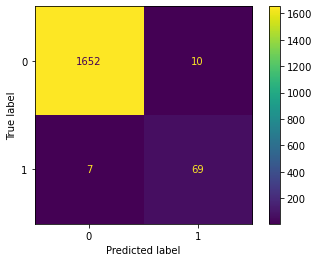

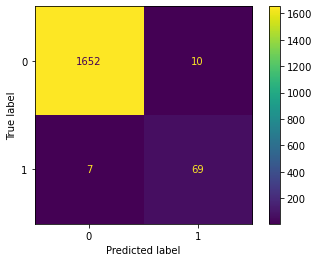

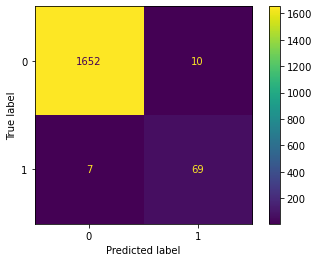

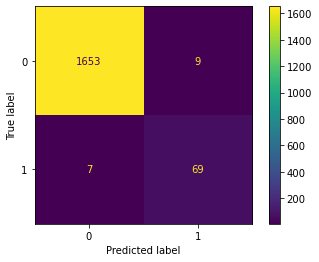

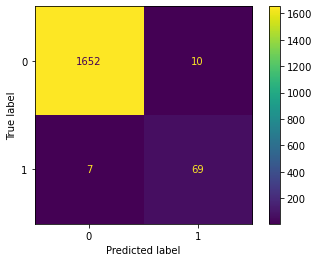

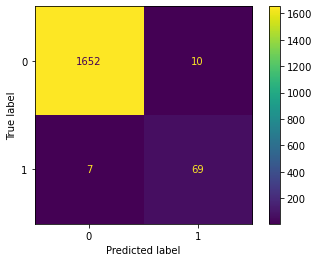

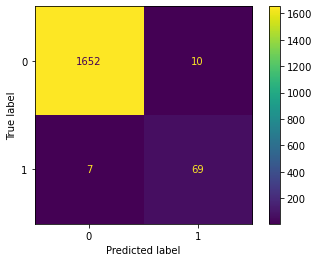

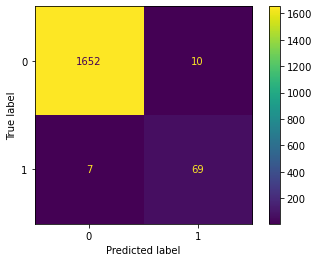

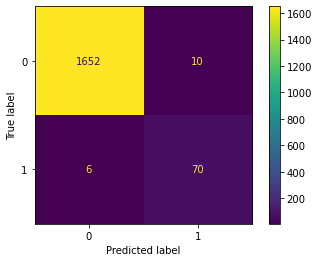

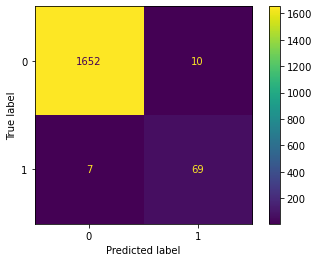

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

########## run the model multiple times #########
nb_reps = 10
save_results = {'f1':[],'recall':[],'precision':[]}
base_path_img = ''

base_path_img = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run7/'

iteration = 1
for i in range(nb_reps): 
    print('------------- iteration ',str(iteration),'----------------------')
    model =create_hybrid_model_NER_2()
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(), #BinaryCrossentropy(), SparseCategoricalCrossentropy() #keras.losses.SparseCategoricalCrossentropy()
        metrics=[keras.metrics.SparseCategoricalCrossentropy()], #keras.metrics.SparseCategoricalAccuracy()
    )
    
    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(expanded_train_logical)
    Train_hybrid_Y = np.array(Train_Y)

    history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=16, epochs=100,verbose=0) 
    
    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(expanded_test_logical)
    Test_hybrid_Y = np.array(Test_Y)

    predictions = model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions, axis=1)
    dict_r = classification_report(Test_Y, preds, output_dict = True)
    print(dict_r)

    f1 = f1_score(Test_hybrid_Y, preds, average='binary')    
    print('F1 score (class 1)....',f1)
    
    save_results['f1'].append(dict_r['1']['f1-score'])
    save_results['recall'].append(dict_r['1']['recall']) 
    save_results['precision'].append(dict_r['1']['precision'])

    cm = confusion_matrix(Test_Y, preds, labels=np.unique(Test_Y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Test_Y))
    img_path = base_path_img + 'confusion_matrix_re' + str(iteration) + '.png'
    iteration = iteration + 1
    
    #disp.figure_.savefig(img_path)
    disp.plot()
    plt.savefig(img_path)
    
    print('------------------------------------------------------------------')

##### Build integrated model (NN layers)

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate



In [38]:
def create_hybrid_model(): #### suggested hybrid model: fine-tuned bert model + logical features
    
    # the first branch operates on the first input
    x = Dense(100, activation="relu")(input_bert)
    #x = Dense(11, activation="relu")(x)
    x = Dense(5, activation="relu")(x)
    x = Model(inputs=input_bert, outputs=x)

    # # the second branch opreates on the second input
    y = Dense(11, activation="relu")(input_logical)
    y = Dense(5, activation="relu")(y)
    y = Model(inputs=input_logical, outputs=y)

    # combine the output of the two branches
    combined = concatenate([x.output, input_logical])

    # apply a FC layer and then a regression prediction on the
    # combined outputs
    z1 = Dense(10, activation="relu")(combined)
    z2 = Dense(5, activation="relu")(z1)
    z = Dense(2, activation="softmax")(z2)

    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[x.input, input_logical], outputs=z)
    
    return(model)
    

In [40]:
model1 =create_hybrid_model()

In [41]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          76900       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 5)            505         ['dense[0][0]']                  
                                                                                                  
 input_2 (InputLayer)           [(None, 11)]         0           []                               
                                                                                            

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

########## run the model multiple times #########
nb_reps = 10
save_results = {'f1':[],'recall':[],'precision':[]}
base_path_img = ''

## Run 3: architecture with 2 hidden layers on top (10 and 5)
## Run4: archutecture with best fine-tuned BERT and optuna architecture
base_path_img = '/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run5/'

iteration = 1
for i in range(nb_reps): 
    print('------------- iteration ',str(iteration),'----------------------')
    model =create_hybrid_model()
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(), #BinaryCrossentropy(), SparseCategoricalCrossentropy() #keras.losses.SparseCategoricalCrossentropy()
        metrics=[keras.metrics.SparseCategoricalCrossentropy()], #keras.metrics.SparseCategoricalAccuracy()
    )
    
    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(train_logical_features)
    Train_hybrid_Y = np.array(Train_Y)

    history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=8, epochs=100,verbose=0) 
    
    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(test_logical_features)
    Test_hybrid_Y = np.array(Test_Y)

    predictions = model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions, axis=1)
    dict_r = classification_report(Test_Y, preds, output_dict = True)
    print(dict_r)

    f1 = f1_score(Test_hybrid_Y, preds, average='binary')    
    print('F1 score (class 1)....',f1)
    
    save_results['f1'].append(dict_r['1']['f1-score'])
    save_results['recall'].append(dict_r['1']['recall']) 
    save_results['precision'].append(dict_r['1']['precision'])

    #cm = confusion_matrix(Test_Y, preds, labels=SVM.classes_)
    cm = confusion_matrix(Test_Y, preds, labels=np.unique(Test_Y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Test_Y))
    img_path = base_path_img + 'confusion_matrix_re' + str(iteration) + '.png'
    iteration = iteration + 1
    
    #disp.figure_.savefig(img_path)
    disp.plot()
    plt.savefig(img_path)
    
    print('------------------------------------------------------------------')
    
    

------------- iteration  1 ----------------------
{'0': {'precision': 0.9939831528279182, 'recall': 0.9939831528279182, 'f1-score': 0.9939831528279182, 'support': 1662}, '1': {'precision': 0.868421052631579, 'recall': 0.868421052631579, 'f1-score': 0.868421052631579, 'support': 76}, 'accuracy': 0.9884925201380897, 'macro avg': {'precision': 0.9312021027297486, 'recall': 0.9312021027297486, 'f1-score': 0.9312021027297486, 'support': 1738}, 'weighted avg': {'precision': 0.9884925201380897, 'recall': 0.9884925201380897, 'f1-score': 0.9884925201380897, 'support': 1738}}
F1 score (class 1).... 0.868421052631579
------------------------------------------------------------------
------------- iteration  2 ----------------------


In [45]:
save_results

{'f1': [0.868421052631579,
  0.8859060402684564,
  0.8947368421052632,
  0.8947368421052632,
  0.9006622516556291,
  0.8961038961038961,
  0.8961038961038961,
  0.8590604026845637,
  0.8859060402684564,
  0.8758169934640522],
 'recall': [0.868421052631579,
  0.868421052631579,
  0.8947368421052632,
  0.8947368421052632,
  0.8947368421052632,
  0.9078947368421053,
  0.9078947368421053,
  0.8421052631578947,
  0.868421052631579,
  0.881578947368421],
 'precision': [0.868421052631579,
  0.9041095890410958,
  0.8947368421052632,
  0.8947368421052632,
  0.9066666666666666,
  0.8846153846153846,
  0.8846153846153846,
  0.8767123287671232,
  0.9041095890410958,
  0.8701298701298701]}

In [ ]:
import pickle

# create a binary pickle file 
f = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Integrated_model_test/Run5/Testing_runs_results.pkl","wb")
pickle.dump(save_results,f)
f.close()

# open a file, where you stored the pickled data
# file = open("/home/wkhal001/Crisis-classification/scripts-rescue-detection/__comparison_new_experimental_design/Fine_tuned_bert/Saved_results_fine_tuned_bert.pkl", 'rb')

# # dump information to that file
# data = pickle.load(file)

# # close the file
# file.close()


In [46]:
import statistics

print('number of runs....',len(save_results['f1']))

print('------------- F1 scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['f1']))
print('stdev (10 runs) ',statistics.stdev(save_results['f1']))
print('max (10 runs) ',max(save_results['f1']))
print('min (10 runs) ',min(save_results['f1']))

print('------------- recall scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['recall']))
print('stdev (10 runs) ',statistics.stdev(save_results['recall']))
print('max (10 runs) ',max(save_results['recall']))
print('min (10 runs) ',min(save_results['recall']))


print('------------- precision scores --------------------')
print('average (10 runs) ',statistics.mean(save_results['precision']))
print('stdev (10 runs) ',statistics.stdev(save_results['precision']))
print('max (10 runs) ',max(save_results['precision']))
print('min (10 runs) ',min(save_results['precision']))

number of runs.... 10
------------- F1 scores --------------------
average (10 runs)  0.8857454257391055
stdev (10 runs)  0.013782631457519219
max (10 runs)  0.9006622516556291
min (10 runs)  0.8590604026845637
------------- recall scores --------------------
average (10 runs)  0.8828947368421053
stdev (10 runs)  0.02098857212983405
max (10 runs)  0.9078947368421053
min (10 runs)  0.8421052631578947
------------- precision scores --------------------
average (10 runs)  0.8888853549718726
stdev (10 runs)  0.014155537579675723
max (10 runs)  0.9066666666666666
min (10 runs)  0.868421052631579


#### Results by integrated model using pretrained Google BERT and optuna architecture 

In [40]:
import re

ls_crisis_hashtags = ['SOSHouston','SOSHarvey','HelpHouston','harveysos','harveyrescue','sendhelp','HarveySOS','Rescue','rescue'
                      ,'HarveyFlood','HARVEYHELP','Relief','PLEASEHELP','URGENT']

def extract_hash_tags(sentence,ls_crisis_hashtags):
    crisis_hashtag_found = False
    for part in sentence.split():
        if part.startswith('#'): 
            if part[1:] in ls_crisis_hashtags:
                crisis_hashtag_found =True
                
    return crisis_hashtag_found

#--------------------  Create filter 1 ---------------------------------------#
# Feature 1.1 keywords with hurricane/flood
rgx_f1_1 = "\\b(Hurricane|HurricaneHarvey|Harvey2017|HARVEYHELP|HarveyStorm|harveyhouston|houstonflood|houstonfloods|houstonflooding|texasflood|texasfloods|texasflooding|harveyflood|harveyflooding|HurricaneFlood|HurricaneSOS)\\b"

# Feature 1.2 keywords with situation descriptions
rgx_f1_2 = "\\b(stranded|stuck|trapped|traps?|trapping|roofs?|rooftop|injured|hurt)\\b"

# Feature 1.3: contain both the following two keyword groups (ignore case):
# group 1: names of cities and towns near Houston
# group 2: flood related keywords. e.g. flood, flooding
rgx_f1_3a = "\\b(Houston|Texas|Galveston|Lake\\sJackson|Pasadena|League\\sCity|DICKINSON|Pearland|Missouri\\sCity|Sugar\\sLand|Richmond|Rosenberg|Alvin|Baytown|Fresno|Mont\\sBelvieu|Humble|Woodlands|Spring|Tomball|Cypress|Brookshire\\sKaty|FRIENDSWOOD)\\b"
rgx_f1_3b = "\\b(flood|floods|flooding|flooded)\\b"


#-------------------- added filter 1: hashtags ---------------------------------------#
#Testing_set_comparison['f1_4'] = Testing_set_comparison.apply(lambda row:1 if extract_hash_tags(row['non_cleaned_text'],ls_crisis_hashtags) == True else 0,axis=1)


#------------------ Create filter 2: Requesting rescue ------------------------#
rgx_f2 = "\\b(rescue|rescues|rescuing|rescued|helps?|helping|WaterRescue|WaterRescueNeeded|aid|assistance|boats?|HarveyRescue|HarveySOS|HurricaneRescue|FloodRescue|HurricaneSOS|HarveyRelief)\\b"

# ------ Create filter 3: address description-----------------------------------#
address_pattern = "(\\b\\d+\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){1,3}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|#DM#|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b|#@#)|(\\b\\d+\\s+(AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#)\\.?\\s+([A-z]|\\d+)\\b)"
non_address_pattern = "\\b\\d+\\s+(am|pm|hrs?|hours?|mins?|minutes?|seconds?|#@#|days?|months?|mon|yr|yrs|years?|#@#|ft|feet|foot|in|inch(es)?|meters?|miles?|#@#|pounds?|pnd|ounce|oz|kg|kilograms?|grams?|tons?|#@#|gallons?|liters?|cubes?|volumes?|quarts?|bottles?|cups?|#@#|per|per\\s+cent|percent|degrees?|times?|#@#|dollars?|USD|GBP|hundreds?|thousands?|millions?|billions?|trillions?|#@#|from|to|at|and|or|were|are|Fan\\sClub|live|hurricane|exit|entrance|#@#|rescued|donation|people|patients|seniors|elderly|women|children|clergy|#@#)\\.?\\s+(#?[A-z]+\\.?(-[A-z]+)?\\s+){0,2}\\b(#@#|ANNEX|ANEX|ANNX|ANX|#@#|ARCADE|ARC|#@#|AVENUE|AV|AVE|AVEN|AVENU|AVN|AVNUE|#@#|BAYOU|BAYOO|BYU|BAYOU|#@#|BEACH|BCH|BEACH|#@#|BEND|BND|#@#|BLUFF|BLF|BLUF|BLUFFS|BLFS|#@#|BOTTOM|BOT|BTM|BOTTM|#@#|BOULEVARD|BLVD|BOUL|BOULV|#@#|BRANCH|BR|BRNCH|#@#|BRIDGE|BRDGE|BRG|#@#|BROOK|BRK|BROOKS|BRKS|#@#|BURG|BG|BURGS|BGS|#@#|BYPASS|BYP|BYPA|BYPAS|BYPS|#@#|CAMP|CP|CMP|#@#|CANYON|CANYN|CYN|CNYN|#@#|CAPE|CPE|#@#|CAUSEWAY|CSWY|CAUSWA|CSWY|#@#|CENTER|CEN|CTR|CENT|CENTR|CENTRE|CNTER|CNTR|CENTERS|CTRS|#@#|CIRCLE|CIR|CIRC|CIRCL|CRCL|CRCLE|CIRCLES|CIRS|#@#|CLIFF|CLF|CLIFFS|CLFS|CLIFFS|#@#|CLUB|CLB|#@#|COMMON|CMN|COMMONS|CMNS|#@#|CORNER|COR|CORNERS|CORS|#@#|COURSE|CRSE|#@#|COURT|CT|COURTS|CTS|#@#|COVE|CV|COVES|COVES|CVS|#@#|CREEK|CRK|#@#|CRESCENT|CRES|CRSENT|CRSNT|CREST|CRST|CR|#@#|CROSSING|CRSSNG|XING|#@#|CROSSROAD|XRD|CROSSROADS|XRDS|#@#|CURVE|CURV|#@#|DALE|DL|#@#|#DAM#|DM|#@#|DIVIDE|DIV|DV|DIVIDE|DVD|#@#|DRIVE|DR|DRIV|DRV|DRIVES|DRS|#@#|ESTATE|EST|ESTATES|ESTS|#@#|EXPRESSWAY|EXP|EXPY|EXPR|EXPRESS|EXPW|#@#|EXTENSION|EXT|EXTN|EXTNSN|EXTENSIONS|EXTS|#@#|FALL|FALLS|FLS|#@#|FERRY|FRY|FRRY|FRY|#@#|FIELD|FLD|FIELDS|FLDS|#@#|FLAT|FLT|FLATS|FLTS|#@#|FORD|FRD|FORDS|FRDS|#@#|FOREST|FRST|FORESTS|FRST|#@#|FORGE|FORG|FRG|FORGES|FRGS|#@#|FORK|FRK|FORKS|FRKS|#@#|FORT|FT|FRT|#@#|FREEWAY|FWY|FREEWY|FRWAY|FRWY|FWY|#@#|GARDEN|GDN|GRDN|GARDENS|GDNS|GRDNS|#@#|GATEWAY|GTWY|GATEWY|GATWAY|GTWAY|GTWY|#@#|GLEN|GLN|GLENS|GLNS|#@#|GREEN|GRN|GREENS|GRNS|#@#|GROVE|GROV|GRV|GROVES|GRVS|#@#|HARBOR|HARB|HBR|HARBR|HRBOR|HARBORS|HBRS|#@#|HAVEN|HVN|#@#|HEIGHTS|HT|HTS|#@#|HIGHWAY|HWY|HIWAY|HIWY|HWAY|HWY|#@#|HILL|HL|HILLS|HLS|#@#|HOLLOW|HLLW|HOLW|HOLLOWS|HOLWS|#@#|INLET|INLT|#@#|ISLAND|#IS#|ISLND|ISLANDS|ISS|ISLNDS|#@#|ISLE|ISLES|#@#|JUNCTION|JCT|JCTION|JCTN|JUNCTN|JUNCTON|JUNCTIONS|JCTNS|JCTS|JUNCTIONS|#@#|KEY|KY|KEYS|KYS|#@#|KNOLL|KNL|KNOL|KNOLLS|KNLS|#@#|LAKE|LK|LAKES|LKS|#@#|LAND|LANDING|LNDG|LNDNG|#@#|LANE|LN|#@#|LIGHT|LGT|LIGHTS|LGTS|#@#|LOAF|LF|#@#|LOCK|LCK|LOCKS|LCKS|#@#|LODGE|LDG|LDGE|#@#|LOOP|LOOPS|#@#|MALL|#@#|MANOR|MNR|MANORS|MNRS|#@#|MEADOW|MDW|MEADOWS|MDWS|#@#|MEWS|#@#|MILL|ML|MILLS|MLS|#@#|MISSION|MISSN|MSN|MSSN|#@#|MOTORWAY|MTWY|#@#|MOUNT|MNT|MT|MOUNTAIN|MNTAIN|MTN|MNTN|MOUNTIN|MTIN|MOUNTAINS|MNTNS|MTNS|#@#|NECK|NCK|#@#|ORCHARD|ORCH|ORCHRD|#@#|OVAL|OVL|#@#|OVERPASS|OPAS|#@#|PARK|PRK|PARKS|#@#|PARKWAY|PARKWY|PKWAY|PKWY|PKY|PARKWAYS|PKWYS|#@#|PASS|PASSAGE|PSGE|#@#|#PATH#|#PATHS#|#@#|PIKE|PIKES|#@#|PINE|PNE|PINES|PNES|#@#|PLACE|PL|#@#|PLAIN|PLN|PLAINS|PLNS|#@#|PLAZA|PLZ|PLZA|#@#|#POINT#|PT|#POINTS#|PTS|#@#|PORT|PRT|PORTS|PRTS|#@#|PRAIRIE|PR|PRR|#@#|RADIAL|RAD|RADL|RADIEL|RADL|#@#|RAMP|#@#|RANCH|RNCH|RANCHES|RNCHS|#@#|RAPID|RPD|RAPIDS|RPDS|#@#|REST|RST|#@#|RIDGE|RDG|RDGE|RIDGES|RDGS|#@#|RIVER|RIV|RVR|RIVR|#@#|ROAD|RD|ROADS|RDS|#@#|ROUTE|RTE|#@#|ROW|#@#|RUE|#@#|#RUN#|#@#|SHOAL|SHL|SHL|SHOALS|SHLS|#@#|SHORE|SHOAR|SHR|SHORES|SHOARS|SHRS|#@#|SKYWAY|SKWY|#@#|SPRING|SPG|SPNG|SPRINGS|SPGS|SPNGS|#@#|SPUR|SPURS|#@#|SQUARE|SQ|SQR|SQRE|SQU|SQUARES|SQRS|#@#|STATION|STA|STATN|STN|#@#|STRAVENUE|STRA|STRAV|STRAVEN|STRAVN|STRVN|STRVNUE|#@#|STREAM|STRM|STREME|#@#|STREET|ST|STRT|STR|STREETS|STS|#@#|SUMMIT|SMT|SUMIT|SUMITT|SUMMIT|#@#|TERRACE|TER|TERR|#@#|THROUGHWAY|TRWY|#@#|TRACE|TRCE|TRACES|TRCE|#@#|TRACK|TRAK|TRACKS|TRAK|TRK|TRKS|#@#|TRAFFICWAY|TRFY|#@#|TRAIL|TRL|TRAILS|TRL|TRLS|#@#|TRAILER|TRLR|TRLRS|#@#|TUNNEL|TUNL|TUNLS|TUNNELS|TUNNL|#@#|TURNPIKE|TRNPK|TPKE|TURNPK|#@#|UNDERPASS|UPAS|#@#|UNION|UN|UNIONS|UNS|#@#|VALLEY|VLY|VALLY|VLLY|VLY|VALLEYS|VLYS|#@#|VIADUCT|VDCT|#VIA#|VIADCT|#@#|VIEW|VW|VIEWS|VWS|#@#|VILLAGE|VILL|VLG|VILLG|VILLIAGE|VILLAGES|VLGS|#@#|VILLE|VL|#@#|VISTA|VIS|VIST|VST|VSTA|#@#|#WALK#|#WALKS#|#@#|#WALL#|#@#|#WAY#|WY|#WAYS#|#@#|#WELL#|WL|WELLS|WLS|#@#)\\.?\\b"

# ------ Create filter 4: with key words of tweets about political -------#
rgx_f4 = "\\b(realDonaldTrump|Trump|DonaldTrump|BarackObama|Obama|Election|Election2016|vote|republicans|republican|democrats|democrat|GOP|dems|immigrant|immigrants|climate\\s?change|gas\\s?prices|ICE|buzzfeed(news)?|tedcruz|SenTedCruz)\\b"
# all tweets about ICE and buzzfeed are polical ones

# ------ Create filter 5: with key words of tweets about offering helps -------#
rgx_f5 = "\\b(donate|donating|donated|donations|Charity|Charities|church|shelters?|sheltering|(we|I)\\s+can\\s+help|open\\s+for\\s+helps?|drop\\s+off|HELP\\sthe\\s#?AmericanRedCross)\\b"

# ------ Create filter 6: with key words of tweets about commercial -------#
rgx_f6 = "\\$\\d+(.\\d{0,2})?|\\$\\$+|\\b(sales|for\\ssale|dollors|hundreds?|thousands?|millions?|billions?|trillions?|[A-z]*market)\\b"
# 2 regex, one  for market; one for open;


# ------ Create filter 7: with key words of tweets of newsreport -------#
rgx_f7 = "#BREAKING:\\s+|\\b(Press\\sConference|Live\\svideo\\sfeed|Live\\sStream|County\\sUpdate:|National\\s+Hurricane\\s+Center|Tropical\\s+Storm\\s+Harvey|MANDATORY\\s+EVACUATION|After\\s+Hurricane\\s+Harvey|Ahead\\s+of\\s+Hurricane\\s+Harvey|like\\s+a\\s+river|6\\s+mil\\s+people|High\\s+call\\s+volume|Epic\\s+flooding|cameras?|webcam|\\bFM\\s+\\d+|News\\s+in\\s+the\\s+#?DMV)\\b"
# SOS tweet not likely use "Tropical Storm Harvey" or "National Hurricane Center"
# typically used by news


# ------ Create filter 8: rescue status update --------------#
rgx_f8 = "-\\sAwaiting\\sUpdates?\\b|-\\sRescued!\\s|\\b(Ha(ve|s)\\sBeen\\sRescued)\\b"


In [41]:
Train_X

,non_cleaned_text,text,label
5667,If you want to figure out the road situation i...,want figure road situation area check harveyfl...,0
813,The Wall Street Journal: Houston flooding expe...,wall street journal houston flooding expected ...,0
3312,@cinnamonfire8 oh and that white oak and houst...,cinnamonfire8 oh white oak houston ave floodin...,0
5021,"Guys, I'm south of the Conroe dam. Where is ev...",guys im south conroe dam everyone evacuating g...,0
5104,12:43pm.. flooding in Breaux Bridge (St. Marti...,1243pm flooding breaux bridge st martin parish...,0
...,...,...,...
48,"Heavy Rain, Flooding Cause Concern Across Tamp...",heavy rain flooding cause concern across tampa...,0
3755,The Wall Street Journal: Hurricane Harvey like...,wall street journal hurricane harvey likely sn...,0
5438,Please DO NOT drive into the water if you can ...,please drive water see road please harvey,0
5419,President Trump Tweets About 2016 Election and...,president trump tweets 2016 election border wa...,0


In [42]:
Test_X

,non_cleaned_text,text,label
1094,Photos of flooding at Villas Dr./Golden Beach ...,photos flooding villas drgolden beach sent us ...,0
1762,Hurricane Harvey videos | Fort Worth Star-Tele...,hurricane harvey videos fort worth startelegra...,0
2034,11830 Greenspark Ln. - Awaiting Update. #Houst...,11830 greenspark ln awaiting update houston ha...,0
2951,@ManBoobiees @LukeBryanSucks @klstorey Oh and ...,manboobiees lukebryansucks klstorey oh also ho...,0
5520,"Guys, this storm is no joke 😳#HurricaneHarvey ...",guys storm joke 😳hurricaneharvey fl side effec...,0
...,...,...,...
4914,"@jackmcme @matthaig1 Indeed, and sometimes dro...",jackmcme matthaig1 indeed sometimes drought fo...,0
4737,My family is #blessed to have spent #Hurricane...,family blessed spent hurricaneharvey south for...,0
5435,HARVEY UPDATE: Williamson County officials mon...,harvey update williamson county officials moni...,0
3007,Please continue to keep Houston in your though...,please continue keep houston thoughts amp pray...,0


In [43]:
train_data_integrated = Train_X['text']

In [44]:
train_data_integrated_non_cleaned = Train_X['non_cleaned_text']

In [45]:
test_data_integrated = Test_X['text']

In [46]:
test_data_integrated_non_cleaned = Test_X['non_cleaned_text']

In [47]:
def logical_evaluation_address(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0
    
def logical_evaluation_final(x,y):
    if x == 1:
        if y == 0:
            return 1
        else:
            return 0
    else:
        return 0


train_logical_features = []
for v1,v2 in zip(train_data_integrated.items(),train_data_integrated_non_cleaned.items()):    
    if re.findall(rgx_f1_1,v1[1],re.IGNORECASE):
        f1_1 =1
    else:
        f1_1=0
        
    if re.findall(rgx_f1_2,v1[1],re.IGNORECASE):
        f1_2=1
    else:
        f1_2=0
        
    if extract_hash_tags(v2[1],ls_crisis_hashtags) == True:
        f1_4 =1
    else: 
        f1_4=0       
        
    if re.findall(rgx_f2,v1[1],re.IGNORECASE):
        f2=1
    else:
        f2=0
    
    if re.findall(address_pattern,v1[1],re.IGNORECASE):
        f3_1=1
    else:
        f3_1=0
        
    if re.findall(non_address_pattern,v1[1],re.IGNORECASE):
        f3_2=1
    else:
        f3_2=0        
        
    if re.findall(rgx_f4,v1[1],re.IGNORECASE):
        f4=1
    else:
        f4=0
    
    if re.findall(rgx_f5,v1[1],re.IGNORECASE):
        f5=1
    else:
        f5=0
    
    if re.findall(rgx_f6,v1[1],re.IGNORECASE):
        f6=1
    else:
        f6=0
    
    if re.findall(rgx_f7,v1[1],re.IGNORECASE):
        f7=1
    else:
        f7=0
     
    if re.findall(rgx_f8,v1[1],re.IGNORECASE):
        f8=1
    else:
        f8=0
    
    ## create a feature vector for training set ###
    train_logical_features.append([f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8])
        
test_logical_features = []
for v1,v2 in zip(test_data_integrated.items(),test_data_integrated_non_cleaned.items()):      
    
    if re.findall(rgx_f1_1,v1[1],re.IGNORECASE):
        f1_1 =1
    else:
        f1_1=0
        
    if re.findall(rgx_f1_2,v1[1],re.IGNORECASE):
        f1_2=1
    else:
        f1_2=0
        
    if extract_hash_tags(v2[1],ls_crisis_hashtags) == True:
        f1_4 =1
    else: 
        f1_4=0     
        
        
    if re.findall(rgx_f2,v1[1],re.IGNORECASE):
        f2=1
    else:
        f2=0
    
    if re.findall(address_pattern,v1[1],re.IGNORECASE):
        f3_1=1
    else:
        f3_1=0
        
    if re.findall(non_address_pattern,v1[1],re.IGNORECASE):
        f3_2=1
    else:
        f3_2=0        
        
    if re.findall(rgx_f4,v1[1],re.IGNORECASE):
        f4=1
    else:
        f4=0
    
    if re.findall(rgx_f5,v1[1],re.IGNORECASE):
        f5=1
    else:
        f5=0
    
    if re.findall(rgx_f6,v1[1],re.IGNORECASE):
        f6=1
    else:
        f6=0
    
    if re.findall(rgx_f7,v1[1],re.IGNORECASE):
        f7=1
    else:
        f7=0
     
    if re.findall(rgx_f8,v1[1],re.IGNORECASE):
        f8=1
    else:
        f8=0
    
    ## create test feature vector ###
    test_logical_features.append([f1_1,f1_2,f1_4,f2,f3_1,f3_2,f4,f5,f6,f7,f8])
    

In [48]:
###### calculate logical feature vectors #########
print('Length logical train features...',len(train_logical_features))
print('Length logical test features...',len(test_logical_features))

Length logical train features... 4054
Length logical test features... 1738


In [43]:
###### Use BERT for feature extraction #########
import transformers
from transformers import AutoModel, BertTokenizerFast, BertModel, BertTokenizer

###### Run BERT to get the train and test feature vectors ######
bert = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)    
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_seq= 36

###### vectorize text using BERT          
max_seq_len = max_seq  
#tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
        Train_X['text'].tolist(),
        max_length = max_seq_len,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )
        
# tokenize and encode sequences in the validation set
tokens_test = tokenizer.batch_encode_plus(
        Test_X['text'].tolist(),
        max_length = max_seq_len,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )                                                                
        
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(Train_Y.tolist())

# for validation set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(Test_Y.tolist())
    
bert.eval()
    
with torch.no_grad():
    outputs = bert(train_seq,train_mask)
    hidden_states = outputs[2]
    
    
with torch.no_grad():
    outputs_test = bert(test_seq,test_mask)
    hidden_states_test = outputs_test[2]
        
        
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings = token_embeddings.permute(1,2,0,3)
    
token_embeddings_test = torch.stack(hidden_states_test, dim=0)
token_embeddings_test = token_embeddings_test.permute(1,2,0,3)
    
print('Bert embedding train shape',token_embeddings.size())
print('Bert embedding test shape',token_embeddings_test.size())
    
    
#### add the word vectors of the last 4 layers -- each token is concatenated in 3072 length vector    
Train_bert_classifier = []
for input_tweet in token_embeddings: 
    token_vecs_cat = []
    for token in input_tweet:
        cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)   # 4 last hidden layers
        #cat_vec = torch.sum(torch.stack([token[-1],token[-2],token[-3],token[-4]]), dim = 0)           # summing the 4 last hidden layers
        # cat_vec = token[-1]
        token_vecs_cat.append(cat_vec)
        
    Train_bert_classifier.append(token_vecs_cat[0])
        
Test_bert_classifier = []
for input_tweet in token_embeddings_test: 
    token_vecs_cat = []
    for token in input_tweet:
        cat_vec_t = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
        #cat_vec_t = torch.sum(torch.stack([token[-1],token[-2],token[-3],token[-4]]), dim = 0)           # summing the 4 last hidden layers
        #cat_vec_t = token[-1]
        token_vecs_cat.append(cat_vec_t)
        
    Test_bert_classifier.append(token_vecs_cat[0])
    
print(len(Train_bert_classifier))
print(len(Test_bert_classifier))
    
#### convert train and test data tensors into numpy array
ls_input_train = [e.numpy() for e in Train_bert_classifier]
ls_input_test = [e.numpy() for e in Test_bert_classifier]  


/home/wkhal001/envs/Twitter_crisis/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Bert embedding train shape torch.Size([4054, 36, 13, 768])
Bert embedding test shape torch.Size([1738, 36, 13, 768])
4054
1738


In [44]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#### create Keras neural network with both inputs ###
input_bert = Input(shape=(3072,))
input_logical = Input(shape=(11,))

In [45]:
# the first branch operates on the first input
x = Dense(64, activation="relu")(input_bert)
#x = Dense(5, activation="relu")(x)
x = Model(inputs=input_bert, outputs=x)

# the second branch opreates on the second input
y = Dense(10, activation="relu")(input_logical)
y = Dense(5, activation="relu")(y)
y = Model(inputs=input_logical, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="softmax")(combined)

# our model will accept the inputs of the two branches and then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [46]:
def create_hybrid_model(): 
    # the first branch operates on the first input
    x = Dense(64, activation="relu")(input_bert)
    #x = Dense(5, activation="relu")(x)
    x = Model(inputs=input_bert, outputs=x)

    # the second branch opreates on the second input
    y = Dense(10, activation="relu")(input_logical)
    y = Dense(5, activation="relu")(y)
    y = Model(inputs=input_logical, outputs=y)

    # combine the output of the two branches
    combined = concatenate([x.output, y.output])

    # apply a FC layer and then a regression prediction on the
    # combined outputs
    z = Dense(2, activation="softmax")(combined)

    # our model will accept the inputs of the two branches and then output a single value
    model = Model(inputs=[x.input, y.input], outputs=z)
    
    return(model)
    

In [48]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 3072)]       0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 10)           120         ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           196672      ['input_1[0][0]']                
                                                                                            

In [51]:
from sklearn.metrics import classification_report

########## run the model multiple times #########
nb_reps = 10
save_results = {'f1':[],'recall':[],'precision':[]}

iteration = 1
for i in range(nb_reps): 
    print('------------- iteration ',str(iteration),'----------------------')
    iteration = iteration + 1
    model =create_hybrid_model()
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(), #BinaryCrossentropy(), SparseCategoricalCrossentropy() #keras.losses.SparseCategoricalCrossentropy()
        metrics=[keras.metrics.SparseCategoricalCrossentropy()], #keras.metrics.SparseCategoricalAccuracy()
    )
    
    Train_hybrid_bert = np.array(ls_input_train)
    Train_hybrid_logical = np.array(train_logical_features)
    Train_hybrid_Y = np.array(Train_Y)

    history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=8, epochs=100,verbose=0) 
    
    Test_hybrid_bert = np.array(ls_input_test)
    Test_hybrid_logical = np.array(test_logical_features)
    Test_hybrid_Y = np.array(Test_Y)

    predictions = model.predict([Test_hybrid_bert,Test_hybrid_logical])
    preds = np.argmax(predictions, axis=1)
    dict_r = classification_report(Test_Y, preds, output_dict = True)
    print(dict_r)

    f1 = f1_score(Test_hybrid_Y, preds, average='binary')    
    print('F1 score (class 1)....',f1)
    
    save_results['f1'].append(dict_r['1']['f1-score'])
    save_results['recall'].append(dict_r['1']['recall']) 
    save_results['precision'].append(dict_r['1']['precision'])
    
    print('------------------------------------------------------------------')
    
    

------------- iteration  1 ----------------------
{'0': {'precision': 0.9928057553956835, 'recall': 0.9963898916967509, 'f1-score': 0.9945945945945946, 'support': 1662}, '1': {'precision': 0.9142857142857143, 'recall': 0.8421052631578947, 'f1-score': 0.8767123287671234, 'support': 76}, 'accuracy': 0.9896432681242808, 'macro avg': {'precision': 0.9535457348406988, 'recall': 0.9192475774273228, 'f1-score': 0.9356534616808589, 'support': 1738}, 'weighted avg': {'precision': 0.989372197786732, 'recall': 0.9896432681242808, 'f1-score': 0.9894397889542679, 'support': 1738}}
F1 score (class 1).... 0.8767123287671234
------------------------------------------------------------------
------------- iteration  2 ----------------------
{'0': {'precision': 0.9934052757793765, 'recall': 0.9969915764139591, 'f1-score': 0.9951951951951953, 'support': 1662}, '1': {'precision': 0.9285714285714286, 'recall': 0.8552631578947368, 'f1-score': 0.8904109589041096, 'support': 76}, 'accuracy': 0.990794016110471

In [ ]:
# model.compile(
#         optimizer=keras.optimizers.Adam(0.001),
#         loss=keras.losses.SparseCategoricalCrossentropy(), #BinaryCrossentropy(), SparseCategoricalCrossentropy() #keras.losses.SparseCategoricalCrossentropy()
#         metrics=[keras.metrics.SparseCategoricalCrossentropy()], #keras.metrics.SparseCategoricalAccuracy()
#     )

# Train_hybrid_bert = np.array(ls_input_train)
# Train_hybrid_logical = np.array(train_logical_features)
# Train_hybrid_Y = np.array(Train_Y)

# history = model.fit(x=[Train_hybrid_bert,Train_hybrid_logical], y=Train_hybrid_Y, batch_size=16, epochs=50,verbose=2) 
    
    

In [75]:
ls_f1 = [0.8767,0.8904,0.7938,0.8630,0.8918,0.8827,0.88,0.8496,0.8666,0.8707]

In [76]:
print(ls_f1)

[0.8767, 0.8904, 0.7938, 0.863, 0.8918, 0.8827, 0.88, 0.8496, 0.8666, 0.8707]


In [3]:
import statistics

print('average (10 runs) ',statistics.mean(ls_f1))
print('stdev (10 runs) ',statistics.stdev(ls_f1))

average (10 runs)  0.86653
stdev (10 runs)  0.028598409046658543


In [1]:
ls_precision = [0.9142,0.9285,0.9454,0.9,0.9166,0.9275,0.8918,0.8441,0.8783,0.9014]

In [4]:
import statistics

print('average (10 runs) ',statistics.mean(ls_precision))
print('stdev (10 runs) ',statistics.stdev(ls_precision))
print('max (10 runs) ',max(ls_precision))
print('min (10 runs) ',min(ls_precision))

average (10 runs)  0.90478
stdev (10 runs)  0.028950678364725382
max (10 runs)  0.9454
min (10 runs)  0.8441


In [5]:
ls_recall = [0.8421,0.8552,0.6842,0.8289,0.8684,0.8421,0.8684,0.8552,0.8552,0.8421]

In [6]:
import statistics

print('average (10 runs) ',statistics.mean(ls_recall))
print('stdev (10 runs) ',statistics.stdev(ls_recall))
print('max (10 runs) ',max(ls_recall))
print('min (10 runs) ',min(ls_recall))

average (10 runs)  0.8341799999999999
stdev (10 runs)  0.05413726997180406
max (10 runs)  0.8684
min (10 runs)  0.6842


In [31]:
Test_hybrid_bert = np.array(ls_input_test)
Test_hybrid_logical = np.array(test_logical_features)

Test_hybrid_Y = np.array(Test_Y)

predictions = model.predict([Test_hybrid_bert,Test_hybrid_logical])
preds = np.argmax(predictions, axis=1)

f1 = f1_score(Test_hybrid_Y, preds, average='binary')    
score = f1

print('F1 score (class 1)....',score)

F1 score (class 1).... 0.8689655172413793


In [32]:
#### print scores ######
from sklearn.metrics import classification_report

dict_r = classification_report(Test_Y, preds, output_dict = True)
dict_r

{'0': {'precision': 0.9922109047333733,
  'recall': 0.9963898916967509,
  'f1-score': 0.9942960072050435,
  'support': 1662},
 '1': {'precision': 0.9130434782608695,
  'recall': 0.8289473684210527,
  'f1-score': 0.8689655172413793,
  'support': 76},
 'accuracy': 0.9890678941311852,
 'macro avg': {'precision': 0.9526271914971214,
  'recall': 0.9126686300589018,
  'f1-score': 0.9316307622232114,
  'support': 1738},
 'weighted avg': {'precision': 0.9887490379831372,
  'recall': 0.9890678941311852,
  'f1-score': 0.9888155024655507,
  'support': 1738}}